# Lending Club Case Study

## Problem statement:
Consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


Importing required python libraries useful for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Data loading:
Data provided contains information about past loan applicants and whether they ‘defaulted’ or not. Applications that are rejected data is not available in dataset.

In [2]:
# Loading dataset from loan.csv file
df_lender = pd.read_csv('loan.csv')
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
# Describe data summary
df_lender.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# Display shape of dataset
print("Shape of dataframe: ", df_lender.shape)

Shape of dataframe:  (39717, 111)


### Initial observation from dataset
Loan dataset have 111 columns and 39717 user details.
Among all columns only 87 columns have numeric values before manipulating/converting data types.

Now we will proceed farther to investigate how many columns actually valid.

## Data cleaning:
### Filter columns:

#### Unique value columns:

There are some columns with no variation in the values. These columns are not much useful for analysis.
We can remove such columns at the beginning of analysis can reduce confusion.

In [5]:

# Removing columns with single value
for column_name in df_lender.columns:
    if df_lender[column_name].nunique(dropna=True) == 1:
        df_lender = df_lender.drop(column_name, axis=1)

#### Removing unwanted/non-relative columns:
There are some columns which have information about loan details but they are not useful for analysis. So we can remove those columns to avoid confusion.

In [6]:
# Removing url column
df_lender = df_lender.drop('url', axis=1)
# Removing 'title' column
df_lender = df_lender.drop('title', axis=1)
# Removing emp_title
df_lender = df_lender.drop('emp_title', axis=1)

In [7]:
s_null_mean = df_lender.isnull().mean()
print("Number of columns with more then 90% null values :", sum(s_null_mean > 0.9))
print("Number of columns with more then 70% null values :", sum(s_null_mean > 0.6))
print("Number of columns with more then 40% null values :", sum(s_null_mean > 0.3))

Number of columns with more then 90% null values : 56
Number of columns with more then 70% null values : 57
Number of columns with more then 40% null values : 58


As per above output the input dataset have,
- 56 columns with more than  90% values are not available.
- 57 columns with more than  60% values are not available.
- 58 columns with more than  30% values are not available.

Now let's get the name and description of columns which are having more than 30% null values and less than 90% null values.
                                                

In [8]:
list_column_names_90p = s_null_mean.index[~(s_null_mean > 0.9)].tolist()
list_column_names_40p = s_null_mean.index[~(s_null_mean > 0.3)].tolist()
diff_90p_40p = [x for x in list_column_names_90p if x not in list_column_names_40p]
diff_90p_40p

['desc', 'mths_since_last_delinq']

From above output we got the information about columns which have more than 30% and less than 90% of null values are:
 - 'desc' as per data dictionary, Loan description provided by the borrower.
 - 'mths_since_last_delinq' as per data dictionary, The number of months since the borrower's last delinquency.
 Both above parameters are important for loan process so we can't remove these columns.
 
 Now we can proceed for data cleaning and manipulation of data based on available information.

In [9]:
df_lender = df_lender[list_column_names_90p]
s_null_mean  = df_lender.isnull().mean().sort_values()
s_null_mean

id                         0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
out_prncp                  0.000000
dti                        0.000000
out_prncp_inv              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
total_pymnt                0.000000
addr_state                 0.000000
delinq_2yrs                0.000000
purpose                    0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0

In [10]:
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

Now we have 45 columns in dataset after removing invalid columns

### Filtering rows:
From previous output there are some rows which data is not available. So now we will clean the data with respect to row wise based on description and relation of data with the case study. To simplify the process will start from higher mean value.

<b>mths_since_last_delinq:</b>
This column has more than 60% data is null values. But removing the entire row with respect to this column will lead to loss of information. So, for now I won’t consider this column for filtering rows.

<b>desc</b>
This column has more than 30% null values and filtering with respect to this column also leads to loss of data. Also as per description of this column 'Loan description' we can make new categorical column from this column so I am not considering this column for filtering rows.

<b>emp_title</b>
As per description of this column this is the job title of employee provided when loan request. And observed that there are vast number of titles present in this column so is not good idea to consider this column for row filtering.


<b>emp_length:</b>
We can consider this column information for filtering rows where null values are present in this column. Also, as per description 'emp_length' is very important factor for analysis on Loans so keeping null values in this column will leads to false analysis report.
So, we consider dropping rows based on columns which have less then <b>3%</b> null values.


In [11]:
columns_row_filter = s_null_mean.index[(s_null_mean < 0.03) & (s_null_mean > 0)].tolist()
df_lender = df_lender[~(df_lender[columns_row_filter].isnull().any(axis=1))]
df_lender.isnull().mean().sort_values()

id                         0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_d               0.000000
last_pymnt_amnt            0.000000
earliest_cr_line           0.000000
last_credit_pull_d         0.000000
delinq_2yrs                0.000000
addr_state                 0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0

In [12]:
print("number of rows after filtering rows: ", df_lender.shape[0])

number of rows after filtering rows:  37835


## Data manipulation and standardization:


After removing invalid columns from data frame, we found that there are 55 columns with 37823 entries are remaining for analysis.
But there are some columns have different datatype (like integers as object). To get filtered data for relative columns with proper datatypes we need to process each column data separately using 'lambda' function.
The following functions are implemented to manipulate or filter as per data dictionary and data available in loans dataset.

<b> term:</b>
This column is defined as 'object' because values are in months and each value in column is followed by string 'months'. the following function will filter 'term' column using lambda function and make new column for integer type.

In [13]:
df_lender['term_months_int'] = df_lender.term.apply(lambda x:int(x.replace(' months','')))

Now the column 'term' values are converted to integers. each value represents number of months the member term duration of loans. Now here we can also manipulate data for term column by converting months in years and we will add new column with name 'term_years' in following code line.

In [14]:
df_lender['term_years'] = df_lender.term_months_int.apply(lambda x:x/12)

<b>int_rate:</b>
This column is defined as 'object' because each value in this column tagged with '%' denoting percentage of interest. now we will remove the tags for values and convert this column to 'float' type.
Also, we can make a categorical variable from this column by making interest bins.

In [15]:
df_lender.int_rate = df_lender.int_rate.apply(lambda x:float(x.replace('%','')))
interest_bins = [5,10,15,20,25]
df_lender['int_bin'] = pd.cut(df_lender['int_rate'], interest_bins).apply(lambda x: '-'.join([str(x.left), str(x.right)]))

<b>loan_amnt:</b>
This column has numerical value representing the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<b>funded_amnt:</b>
This column has numerical value representing the total amount committed to that loan at that point in time.

<b>funded_amnt_inv:</b>
This column has numerical value representing the total amount committed by investors for that loan at that point in time.

As there is not much difference in values between these 3 columns, we can make bins for 'loan_amnt' column based on value for easy analysis as follows.

In [16]:

loan_amnt_bins = [0,5000,10000,15000,20000,25000,30000,35000]
df_lender['loan_amnt_bin_k'] = pd.cut(df_lender['loan_amnt'], loan_amnt_bins).apply(lambda x: '-'.join([str(int(x.left/1000)), str(int(x.right/1000))]))

<b>installment:</b>
For this column also we can make bins for analysis based on installment made from users.

In [17]:

installment_bins = [x for x in range(0,1401,100)]
df_lender['installment_bin_100s'] = pd.cut(df_lender['installment'], installment_bins).apply(lambda x: '-'.join([str(int(x.left/100)), str(int(x.right/100))]))

<b>annual_inc:</b>
This column describes self-reported annual income provided by the borrower during registration. This is a numerical column.
From this column we can apply binning based on income range and make new categorical column. As per observation there is a huge gap between minimum and maximum values from this column. To understand distribution of entries we can use box plot here

Minimum of annual_inc: 4000.0
Maximum of annual_inc: 6000000.0


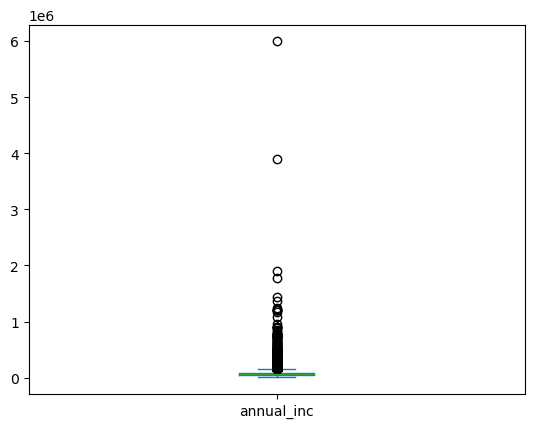

In [18]:
print("Minimum of annual_inc:", df_lender.annual_inc.min())
print("Maximum of annual_inc:", df_lender.annual_inc.max())
df_lender.annual_inc.plot.box()
plt.show()

From figure we can observe that most of the members are earning below 1M, and very few members are earning more than 1M. so we will remove the outliers based on income below 1.4e5.
Also, we can make new derived metric from this column as monthly income and income bins so that we can compare installment with monthly income.

In [19]:
df_lender = df_lender[df_lender.annual_inc <=1.4e5]
income_bins = [0,5e3,1e4,5e4,1e5,1.4e5]#5e5,1e6,2e6
df_lender['annual_inc_bin_k'] = pd.cut(df_lender['annual_inc'], income_bins).apply(lambda x: '-'.join([str(int(x.left/1000)), str(int(x.right/1000))]))
df_lender['monthly_inc'] = df_lender.annual_inc.apply(lambda x: x/12.0)
set(df_lender.annual_inc_bin_k)

{'0-5', '10-50', '100-140', '5-10', '50-100'}

<b>issue_d:</b>
The month which the loan was funded. The data format is 'object' defining Year-Month of loan disbursement.
from this column we can extract year and month and create new columns in dataframe.

In [20]:
year_month = pd.to_datetime(df_lender['issue_d'], format="%b-%y")
df_lender['year_issue_d'] = year_month.dt.year
df_lender['year_issue_d'] = df_lender['year_issue_d'].astype(str)
df_lender['month_issue_d'] = year_month.dt.strftime('%B')

<b>desc:</b>
This column contains Loan description provided by the borrower. From the initial analysis we found that there are many people not provided loan description so we can make new categorical column from this column. With binary information like if user provided description labeled as 'Yes ‘and not provided as 'No' so that we can use this information for our analysis.

In [21]:
df_lender['desc_status']= (~df_lender.desc.isnull()).apply(lambda x: 'Yes' if x else 'No')

<b>purpose:</b>
This column contains purpose of loan request and observed that there are 14 categories from all values.

In [22]:
set(df_lender.purpose)

{'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

<b>title:</b>
This column has titles provided for loan request from the borrower. And this column has various titles and they are not unique.

<b>zip_code and addr_state</b>
These columns have inter-relationship with each other. And the unique values from this column are extracted from bellow code.

In [23]:
print("Number of Cities or villages considered for analysis: ", len(set(df_lender.zip_code)))
print("Number of states considered for analysis: ", len(set(df_lender.addr_state)))

Number of Cities or villages considered for analysis:  803
Number of states considered for analysis:  49


<b>revol_util:</b>
This column has information in percentile of revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
We can filter this column by removing '%' and convert type to float.

In [24]:
df_lender.revol_util = df_lender.revol_util.apply(lambda x:float(x.replace('%','')))


<b>last_pymnt_d:</b>
    This column has date information of last payment received. Here we can extract month and year information in separate columns for analysis.


In [25]:
year_month_lpd = pd.to_datetime(df_lender['last_pymnt_d'], format="%b-%y")
df_lender['year_last_pymnt_d'] = year_month_lpd.dt.year
df_lender['month_last_pymnt_d'] = year_month_lpd.dt.strftime('%B')

<b>last_credit_pull_d:</b>
The most recent month LC pulled credit for this loan. Extracting year and month information from this column for analysis.

In [26]:
year_month_lcpd = pd.to_datetime(df_lender['last_credit_pull_d'], format="%b-%y")
df_lender['year_last_credit_pull_d'] = year_month_lcpd.dt.year
df_lender['month_last_credit_pull_d'] = year_month_lcpd.dt.strftime('%B')

<b>earliest_cr_line</b>
This column contains the month the borrower's earliest reported credit line was opened. But the date information is not proper.
from pandas extracting date time information leads to
 - When there is no year information is available considering as current year.
 - When day not available considering '1' as day.
Now extracting date information from earliest_cr_line column as follows.   

In [27]:
year_month_ecrl = pd.to_datetime(df_lender['earliest_cr_line'], format="%b-%y")
df_lender['year_earliest_cr_line'] = year_month_ecrl.dt.year
df_lender['month_earliest_cr_line'] = year_month_ecrl.dt.strftime('%B')
df_lender['day_earliest_cr_line'] = year_month_ecrl.dt.day

<b>dti:</b>
Debit-To-Income ratio is an important factor while approving the loans. For this column we will add new column with bins for analysis.

In [28]:

dti_bins = [0,5,10,15,20,25,30]
df_lender['dti_bin'] = pd.cut(df_lender['dti'], dti_bins).apply(lambda x: '-'.join([str(int(x.left)), str(int(x.right))]))

<b>loan_status:</b>
    This column is the target column. Information about loan status as categorical variable. 
    We can also add additional binary columns from this column information for easy processing as follows.

In [29]:
df_lender['Fully paid'] = df_lender.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)
df_lender['Charged Off'] = df_lender.loan_status.apply(lambda x:1 if x=='Charged Off' else 0)
df_lender['Current'] = df_lender.loan_status.apply(lambda x:1 if x=='Current' else 0)

set(df_lender.loan_status)

{'Charged Off', 'Current', 'Fully Paid'}

<b>open_acc:</b>
    This column represents number of open credit lines in the borrower's credit file. For easy analysis we are adding categorical column with bin ranges

In [30]:
acc_bins = [0,10,15,20,25,30,35,40,45]
df_lender['open_acc_bin'] = pd.cut(df_lender['open_acc'], acc_bins).apply(lambda x: '-'.join([str(x.left), str(x.right)]))

<b>revol_util</b>
This column describes revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Here we are deriving additional column with bin ranges from this column.

In [31]:
acc_bins = [-1,10,20,30,40,50,60,70,80,90,100]
df_lender['revol_util_bin'] = pd.cut(df_lender['revol_util'], acc_bins).apply(lambda x: '-'.join([str(x.left), str(x.right)]))

In [32]:
df_lender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35875 entries, 0 to 39680
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        35875 non-null  int64   
 1   member_id                 35875 non-null  int64   
 2   loan_amnt                 35875 non-null  int64   
 3   funded_amnt               35875 non-null  int64   
 4   funded_amnt_inv           35875 non-null  float64 
 5   term                      35875 non-null  object  
 6   int_rate                  35875 non-null  float64 
 7   installment               35875 non-null  float64 
 8   grade                     35875 non-null  object  
 9   sub_grade                 35875 non-null  object  
 10  emp_length                35875 non-null  object  
 11  home_ownership            35875 non-null  object  
 12  annual_inc                35875 non-null  float64 
 13  verification_status       35875 non-null  object  


Now the next step is to collect information of numerical and catagorical entries and proceed for analysis.

## Univariate analysis:

After filtering and manipulation of data provided the next step is to start our analysis based on available information from dataframe.
Before moving forward, we will collect information about numerical and categorical  entries from data available.

### Univariate analysis on numarical values:
 In the first step of our analysis we will go through the distribution of basic numerical variables using following code with <b>box</b> plots.
 
 ##### loan_amnt:

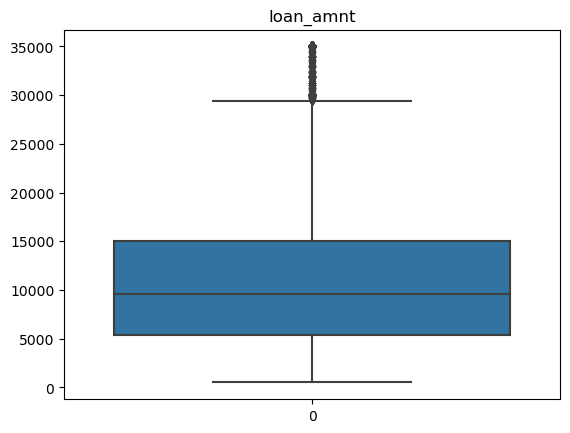

Minimum loan amount taken: 500
Maximum loan amount taken: 35000
Median of loan amount taken: 9600.0


In [33]:
sns.boxplot(df_lender['loan_amnt'])
plt.title('loan_amnt')
plt.show()
print("Minimum loan amount taken:", df_lender['loan_amnt'].min())
print("Maximum loan amount taken:", df_lender['loan_amnt'].max())
print("Median of loan amount taken:", df_lender['loan_amnt'].median())

From the above box plot from loan amount taken from borrower we can summarize  following observations:
 - The IQR is between 5000 to 15000 so most of the people are taken loan between this range.
 - Upper fence stands at near 30,000 and very less people have taken loan more then 30,000
 - And minimum loan amount taken by member is 500 and maximum is 35000

##### int_rate:

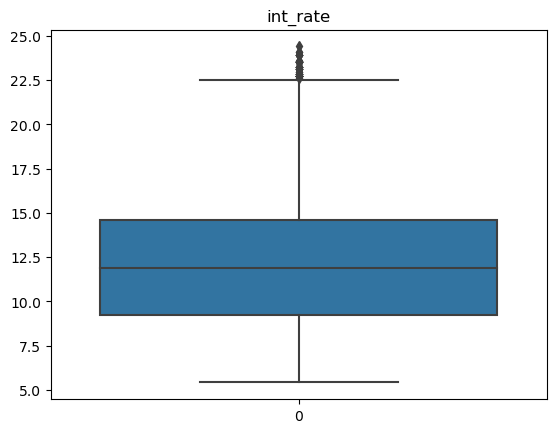

Minimum interest rate: 5.42
Maximum interest rate: 24.4
Median of interest rate: 11.86


In [34]:
sns.boxplot(df_lender['int_rate'])
plt.title('int_rate')
plt.show()
print("Minimum interest rate:", df_lender['int_rate'].min())
print("Maximum interest rate:", df_lender['int_rate'].max())
print("Median of interest rate:", df_lender['int_rate'].median())

From the above box plot from interest charged from borrower we can summarize following observations:
 - The IQR is between 9% to 15% so most of the people are charged less interest.
 - Upper fence stands at near 22.5 and very less people have charged interest more then 22.5
 - And minimum interest charged by lender is 5.42 and maximum is 24.59

##### installment:

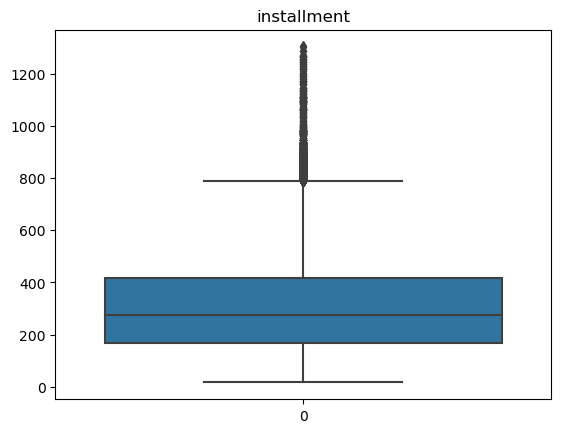

Minimum instalment paid by borrower: 16.08
Maximum instalment paid by borrower: 1305.19
Median of installment: 276.06


In [35]:
sns.boxplot(df_lender['installment'])
plt.title('installment')
plt.show()
print("Minimum instalment paid by borrower:", df_lender['installment'].min())
print("Maximum instalment paid by borrower:", df_lender['installment'].max())
print("Median of installment:", df_lender['installment'].median())

From the above box plot from installment paid by borrower we can summarize following observations:
 - The IQR is between 190 and 420 so most of the people are paying less installment. Because most of the members are taken less loan amount.
 - Upper fence stands at near 810 and very less people are paying installments more then 810
 - And minimum installment paid by borrower is 16.08 and maximum is 1305.19

##### annual_inc:

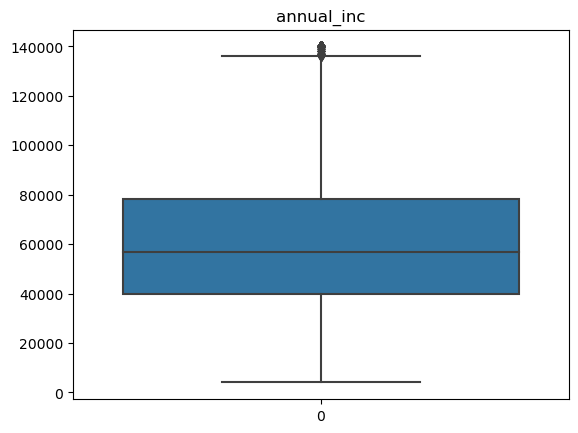

Minimum annual income of borrower: 4000.0
Maximum annual income of borrower: 140000.0
Median of annual income: 57000.0
25th percentile of annual income: 40000.0
75th percentile of annual income: 78405.0


In [36]:
sns.boxplot(df_lender['annual_inc'])
plt.title('annual_inc')
plt.show()
print("Minimum annual income of borrower:", df_lender['annual_inc'].min())
print("Maximum annual income of borrower:", df_lender['annual_inc'].max())
print("Median of annual income:", df_lender['annual_inc'].median())
print("25th percentile of annual income:", np.quantile(df_lender['annual_inc'], 0.25))
print("75th percentile of annual income:", np.quantile(df_lender['annual_inc'], 0.75))

From the above box plot from annual income of borrower we can summarize following observations:
 - The IQR is between 40000 and 80000 so most of the people are earning less than 100000. This is the reason why many people have taken less loan and paying less installments.

##### dti:

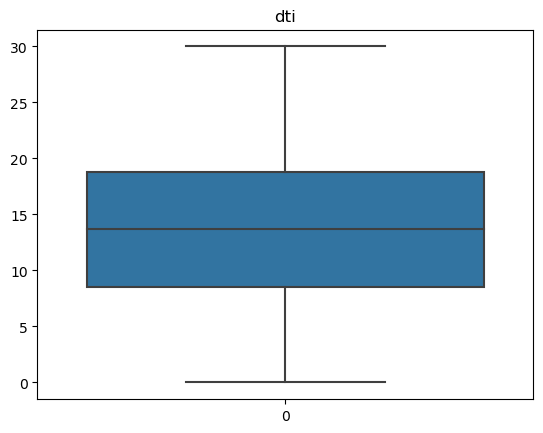

Minimum DTI of borrower: 0.0
Maximum DTI borrower: 29.99
Median of DTI: 13.7
25th percentile of DTI: 8.49
75th percentile of DTI: 18.82


In [37]:
sns.boxplot(df_lender['dti'])
plt.title('dti')
plt.show()
print("Minimum DTI of borrower:", df_lender['dti'].min())
print("Maximum DTI borrower:", df_lender['dti'].max())
print("Median of DTI:", df_lender['dti'].median())
print("25th percentile of DTI:", np.quantile(df_lender['dti'], 0.25))
print("75th percentile of DTI:", np.quantile(df_lender['dti'], 0.75))

From above plot we can summarize following point regarding debt-to-income ratio:
 - The IQR of DTI stands between 8% and 19% so most of the borrowers are having very good DTI ratio.
 - In general DTI of the borrower should be below 38% so all the members of the financial institution have very good DTI ratio.

##### total_pymnt:

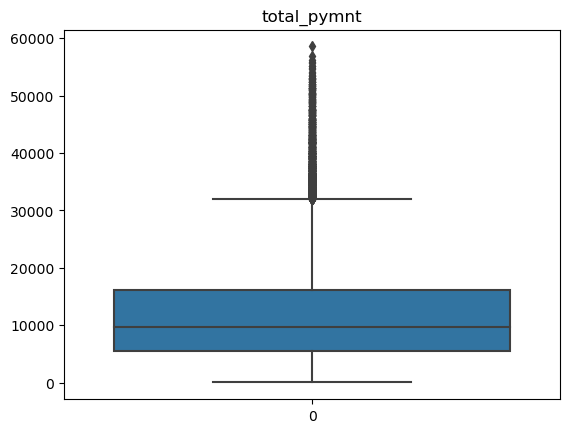

Minimum total_pymnt of borrower: 33.73
Maximum total_pymnt borrower: 58563.67993
Median of total_pymnt: 9731.737119
25th percentile of total_pymnt: 5557.025543
75th percentile of total_pymnt: 16101.84162


In [38]:
sns.boxplot(df_lender['total_pymnt'])
plt.title('total_pymnt')
plt.show()
print("Minimum total_pymnt of borrower:", df_lender['total_pymnt'].min())
print("Maximum total_pymnt borrower:", df_lender['total_pymnt'].max())
print("Median of total_pymnt:", df_lender['total_pymnt'].median())
print("25th percentile of total_pymnt:", np.quantile(df_lender['total_pymnt'], 0.25))
print("75th percentile of total_pymnt:", np.quantile(df_lender['total_pymnt'], 0.75))

From the total payment received column we can compare the information with loan amount taken by the barrowers.
from plot <b>loan_amnt</b> we can see that IQR range is between 5000 and 15000 
And from the above plot total_pymnt also the IQR is at 5000 and 15000 approximately
so we can relate this plots with outstanding principle column.

##### total_rec_int:

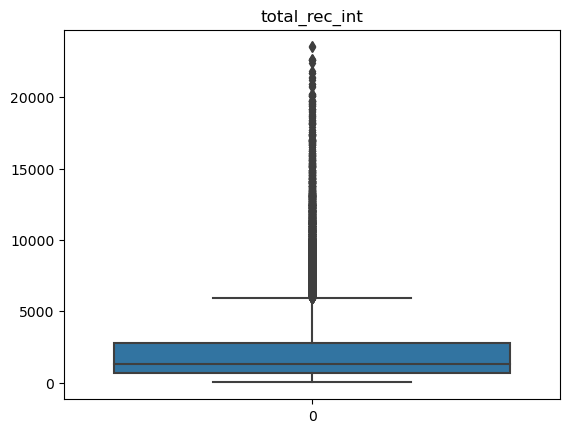

Minimum total interest from borrower: 6.22
Maximum total interest from borrower: 23563.68
Median of toatl interest: 1331.96
25th percentile of total interest from borrower: 661.3
75th percentile of total interest from borrower: 2764.2799999999997


In [39]:
sns.boxplot(df_lender['total_rec_int'])
plt.title('total_rec_int')
plt.show()
print("Minimum total interest from borrower:", df_lender['total_rec_int'].min())
print("Maximum total interest from borrower:", df_lender['total_rec_int'].max())
print("Median of toatl interest:", df_lender['total_rec_int'].median())
print("25th percentile of total interest from borrower:", np.quantile(df_lender['total_rec_int'], 0.25))
print("75th percentile of total interest from borrower:", np.quantile(df_lender['total_rec_int'], 0.75))

From above plot we can summarize that most of the people are paid less total interest because most of the people are paying with less interest rate.

##### total_rec_late_fee:

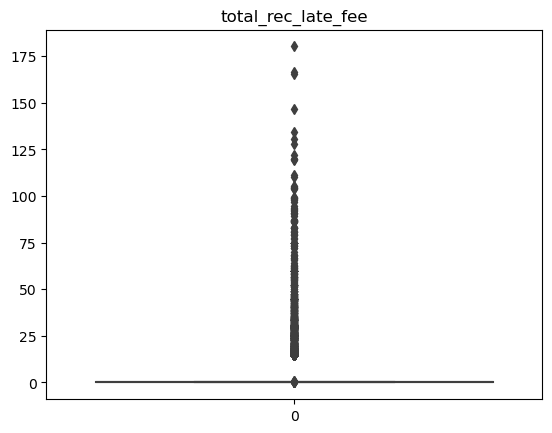

Minimum total late fee recieved from borrower: 0.0
Maximum total late fee recieved from borrower: 180.2
Median of toatl late fee recieved from borrower: 1331.96
25th percentile of total late fee recieved from borrower: 0.0
75th percentile of total late fee recieved from borrower: 0.0


In [40]:
sns.boxplot(df_lender['total_rec_late_fee'])
plt.title('total_rec_late_fee')
plt.show()
print("Minimum total late fee recieved from borrower:", df_lender['total_rec_late_fee'].min())
print("Maximum total late fee recieved from borrower:", df_lender['total_rec_late_fee'].max())
print("Median of toatl late fee recieved from borrower:", df_lender['total_rec_int'].median())
print("25th percentile of total late fee recieved from borrower:", np.quantile(df_lender['total_rec_late_fee'], 0.25))
print("75th percentile of total late fee recieved from borrower:", np.quantile(df_lender['total_rec_late_fee'], 0.75))

From the above plot we can observe that most of the people are not paid late fee so members are very punctual on paying loan term regularly. and very less people paid less late fee.

### Univariate analysis on categorical variables:
Next our analysis we will go through the distribution of basic categorical variables using following code with <b>bar</b> plots.

##### term:

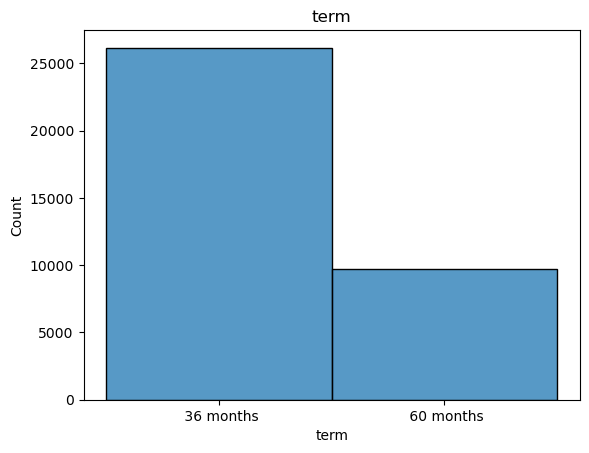

In [41]:
sns.histplot(df_lender['term'])
plt.title('term')
plt.show()

From above plot most of the members are opting for 36 months term plan (3 years).
there are 2 points we can observe from this plot are
 - People are well planned towards repayment and they want to save total interest amount.
 - Members are earning sufficient amount as per income plot from <b>numerical univariate</b> analysis.

##### int_bin:

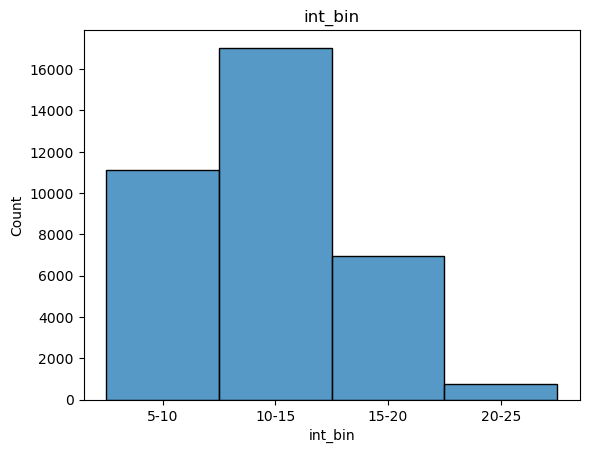

In [42]:
sns.histplot(df_lender['int_bin'])
plt.title('int_bin')
plt.show()

From the plot we can observe that most of the members are charged 10% to 15% interest in loan.
and there are very few people charged 20% to 25% interest so these members are categorized as more risky borrowers.

##### loan_amnt_bin_k:

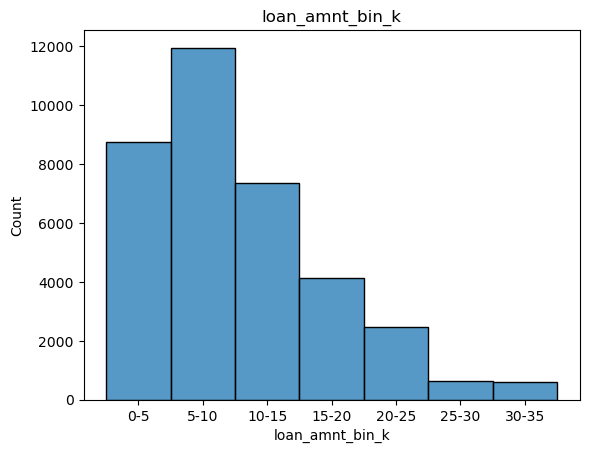

In [43]:
sns.histplot(df_lender['loan_amnt_bin_k'])
plt.title('loan_amnt_bin_k')
plt.show()

From the plot we can observe that almost 12000 people are taken loan between 5000 to 10000
and very less people are taking loan above 20,000

##### installment_bin_100s:

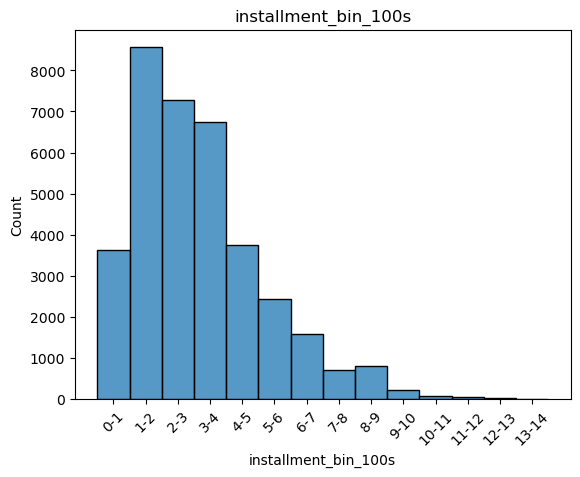

In [44]:
sns.histplot(df_lender['installment_bin_100s'])
plt.xticks(rotation=45)  
plt.title('installment_bin_100s')
plt.show()

From the above plot most of the people are paying installments less then 500

##### grade:

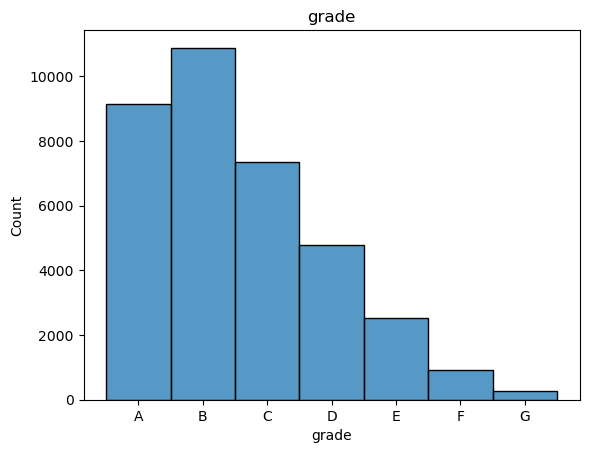

In [45]:
sns.histplot(df_lender['grade'].sort_values())
plt.title('grade')
plt.show()

From the plot we can observ that many people are belongs to grad A,B,C Letter-of-Credit loan grades.

##### emp_length:

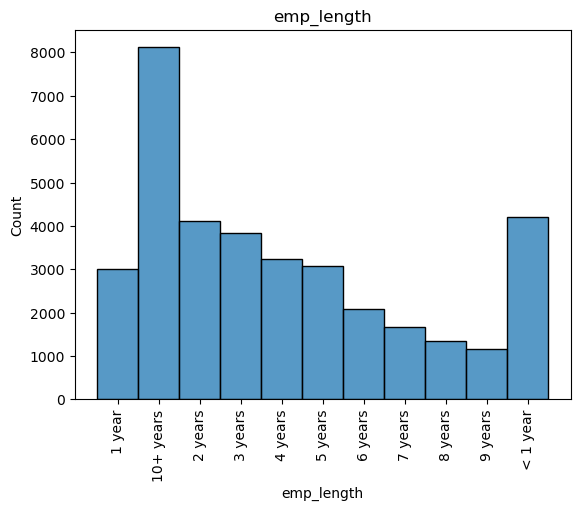

In [46]:
sns.histplot(df_lender['emp_length'].sort_values())
plt.xticks(rotation=90) 
plt.title('emp_length')
plt.show()

Many of the members have employment duration more then 10 years

##### home_ownership:

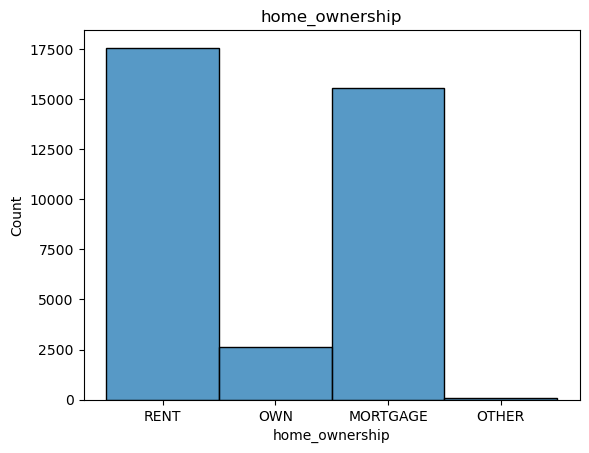

In [47]:
sns.histplot(df_lender['home_ownership'])
plt.title('home_ownership')
plt.show()

##### purpose:

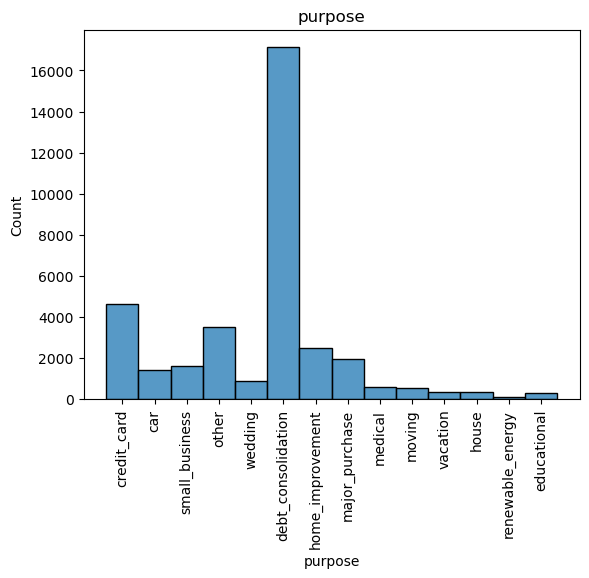

In [48]:
sns.histplot(df_lender['purpose'])
plt.xticks(rotation=90) 
plt.title('purpose')
plt.show()

From the above 2 plots 'home_ownership' and 'purpose' we can observe following points:
 - Many members are opting for loan to consolidate all debit accounts.
 - It is bit surprising because very less people are having own-house and many mortgage homeownership, so people are taking home loans from different financial institutions.
 - Most of the people are likely to stay in rental homes compared with own house.

##### annual_inc_bin_k:

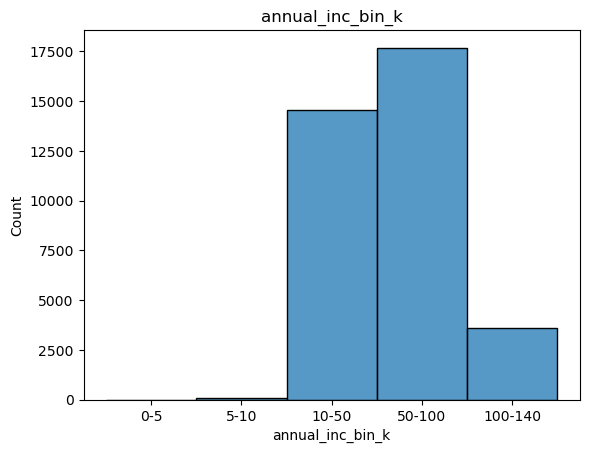

In [49]:
sns.histplot(df_lender['annual_inc_bin_k'])
plt.title('annual_inc_bin_k')
plt.show()

Many people are earning between 10,000 to 100000 per year.

##### verification_status:

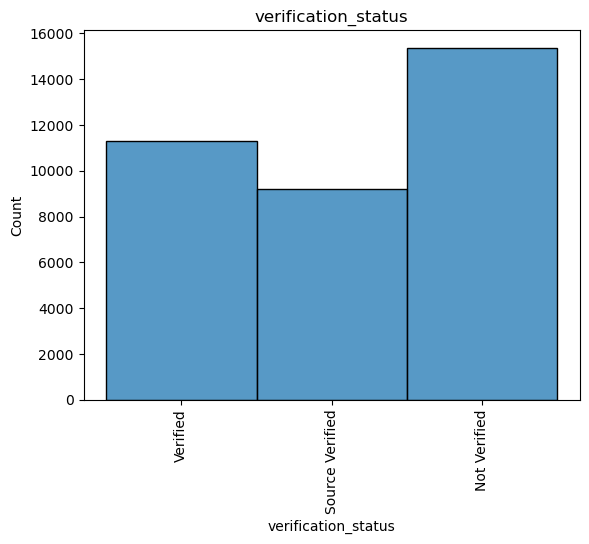

In [50]:
sns.histplot(df_lender['verification_status'])
plt.xticks(rotation=90) 
plt.title('verification_status')
plt.show()

As per verification status many members are not verified.

##### year_issue_d:

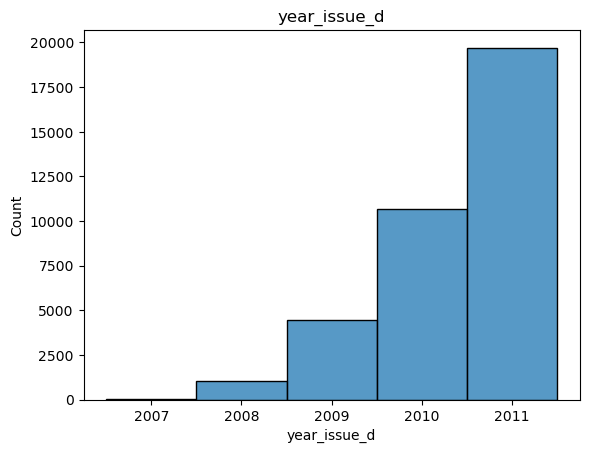

In [51]:
sns.histplot(df_lender['year_issue_d'].sort_values())
plt.title('year_issue_d')
plt.show()

The number of loans are issued are increasing every year and most of the loans are issued in 2011

##### month_issue_d:

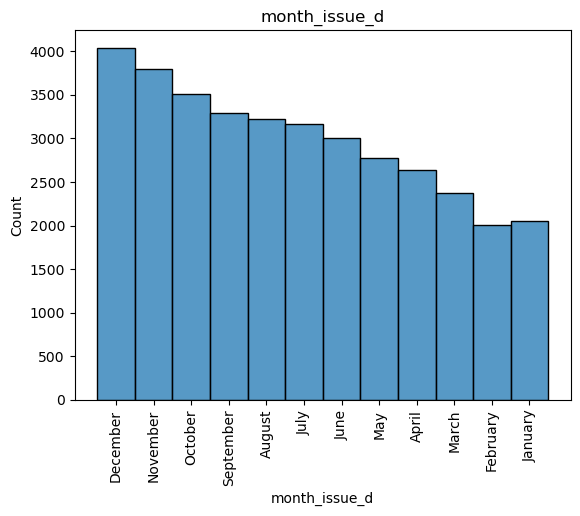

In [52]:
sns.histplot(df_lender['month_issue_d'])
plt.xticks(rotation=90) 
plt.title('month_issue_d')
plt.show()

The number of loans are issued are increasing monthly in all years.
 - Least number of loans inssued in February.
 - Highest number of loans issued in December.

##### addr_state:

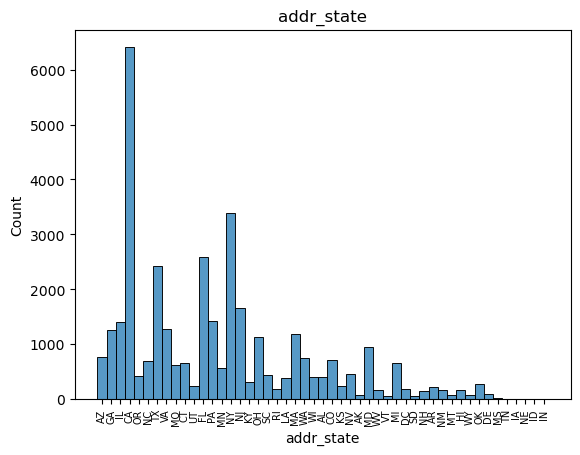

In [53]:
sns.histplot(df_lender['addr_state'])
plt.xticks(rotation=90, fontsize=7) 
plt.title('addr_state')
plt.show()

More loans are issued for state people in CA.

##### desc_status:

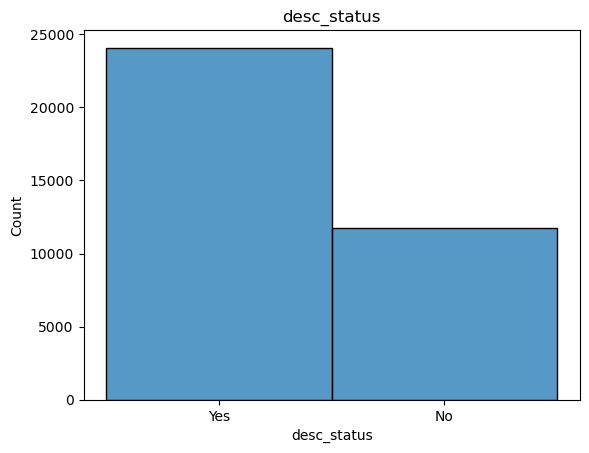

Number of people who not provided loan description:  11776
Number of people who provided loan description:  24099


In [54]:
sns.histplot(df_lender['desc_status'])
plt.title('desc_status')
plt.show()
print("Number of people who not provided loan description: ", sum(df_lender['desc_status']=="No"))
print("Number of people who provided loan description: ", sum(df_lender['desc_status']=="Yes"))

##### loan_status:

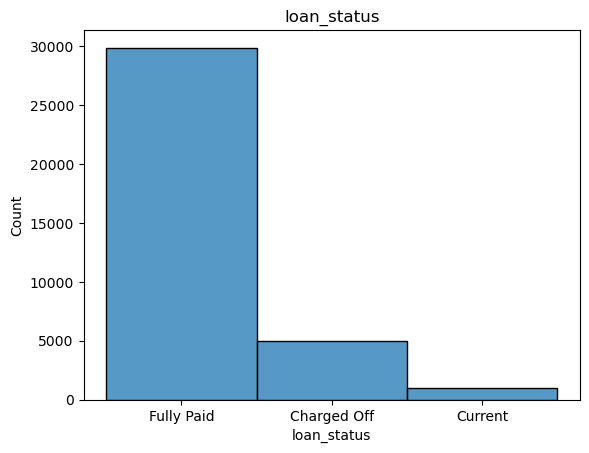

In [55]:
sns.histplot(df_lender['loan_status'])
plt.title('loan_status')
plt.show()

As per above plot we can observe that many people are already cleared loan and some people are still paying loan.

### Segmented univariate analysis:

Our target variable is 'loan_status'

##### grade Vs loan_status:

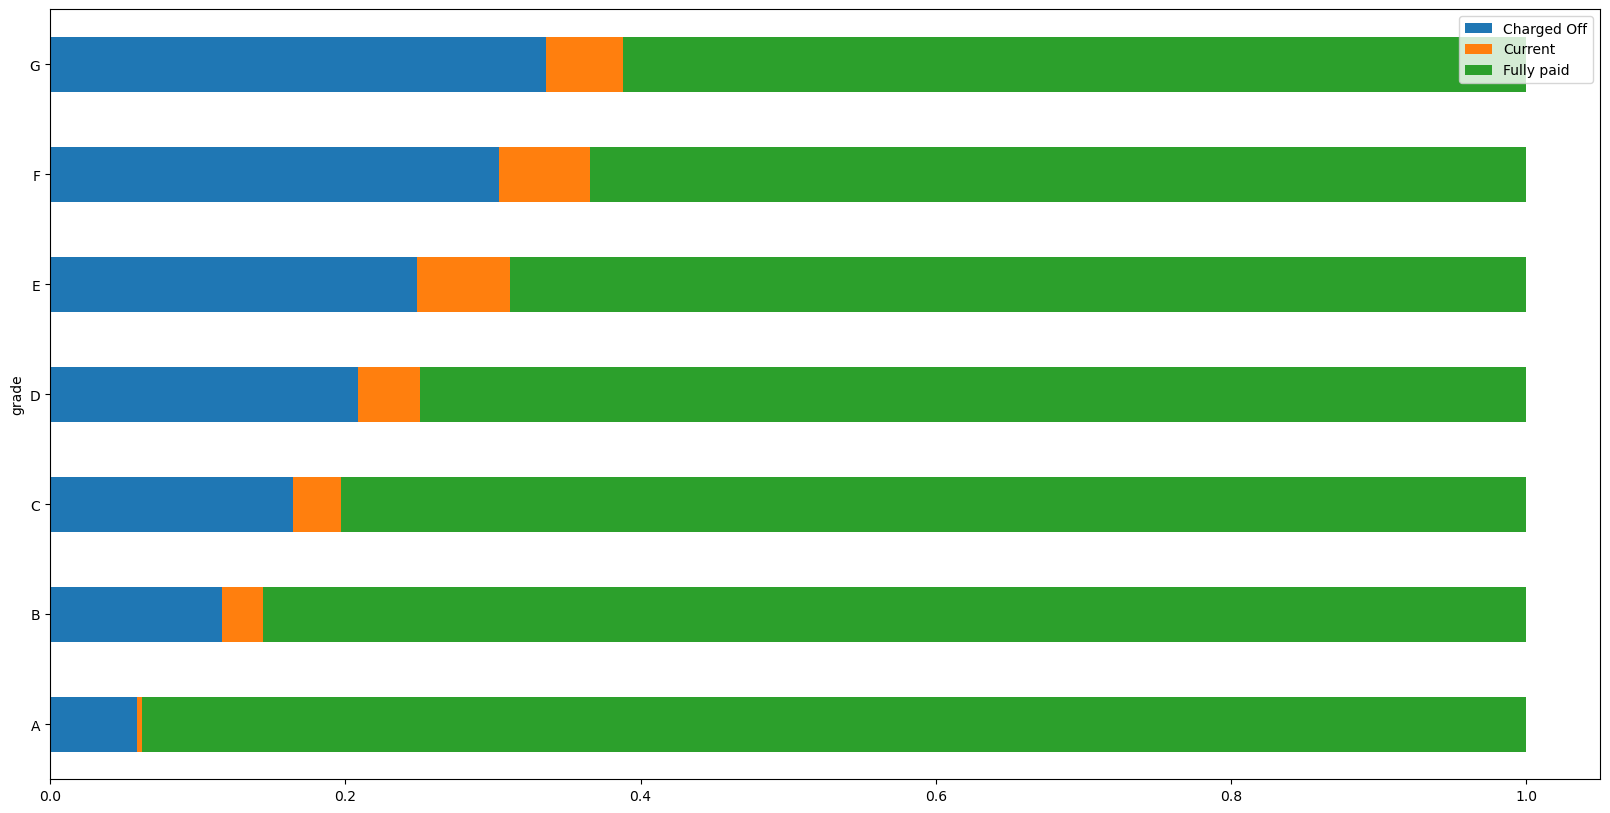

In [56]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['grade'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>From the above plot we can observe that highest percentage of people are defaulted from <b>grade G</b>
, And <b>grade A</b> people are most trustable members.

##### emp_length Vs loan_status:

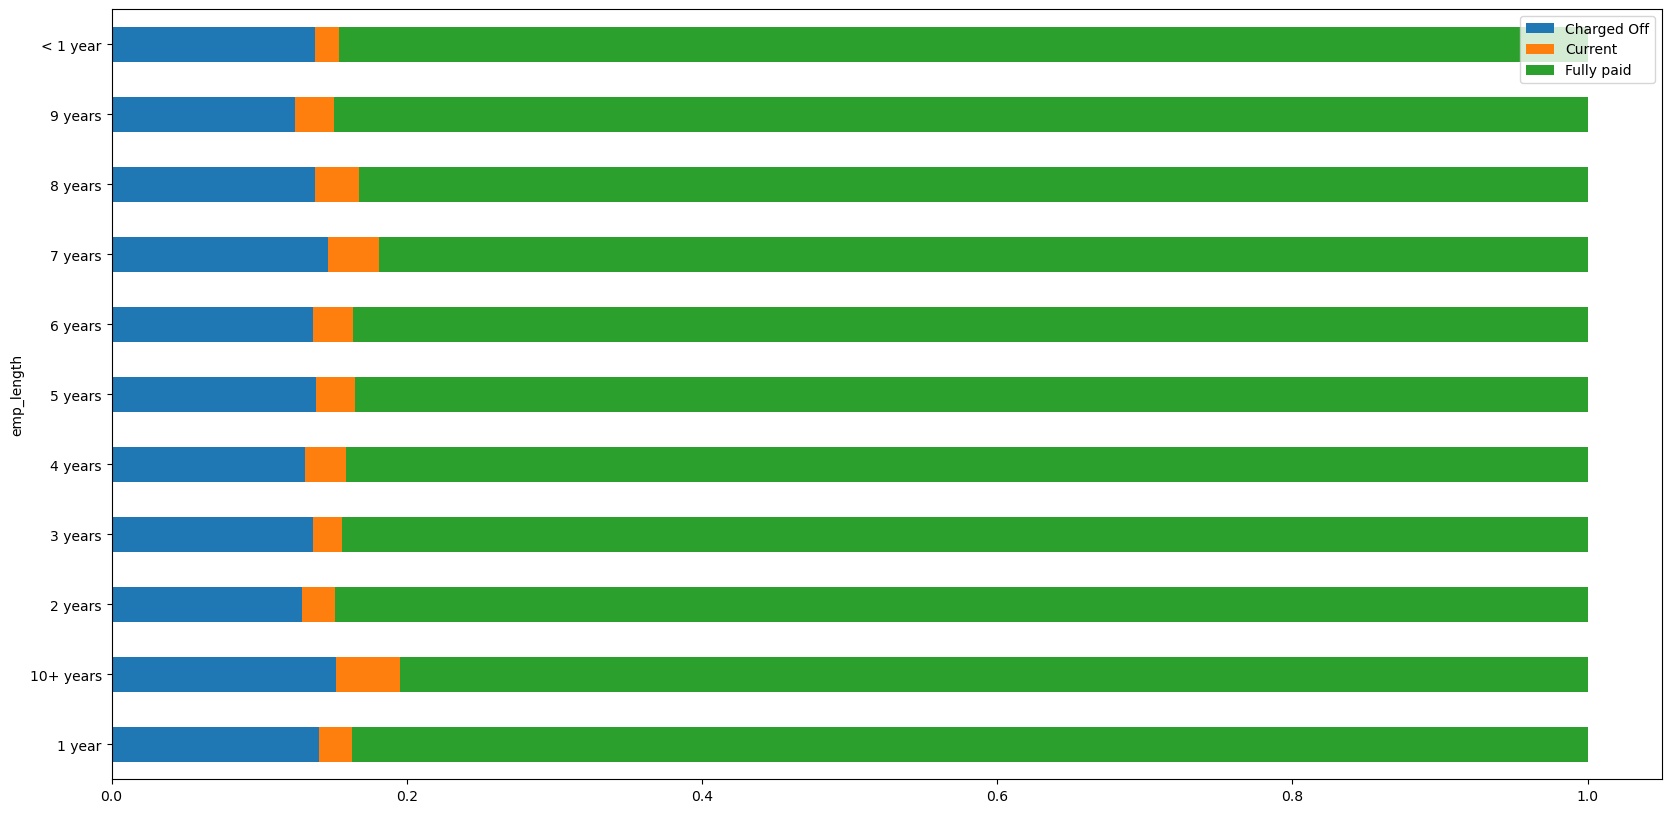

In [57]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['emp_length'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

Highest number of people are defaulted from 10+ years employee length, but the number of people under this group is more then all other groups. So it is a good idea to analyze average or percentage of people.

*observation from mean value almost all empployee length groups have approximatly same percentage of defaulters.*

##### loan_amnt_bin_k Vs loan_status:

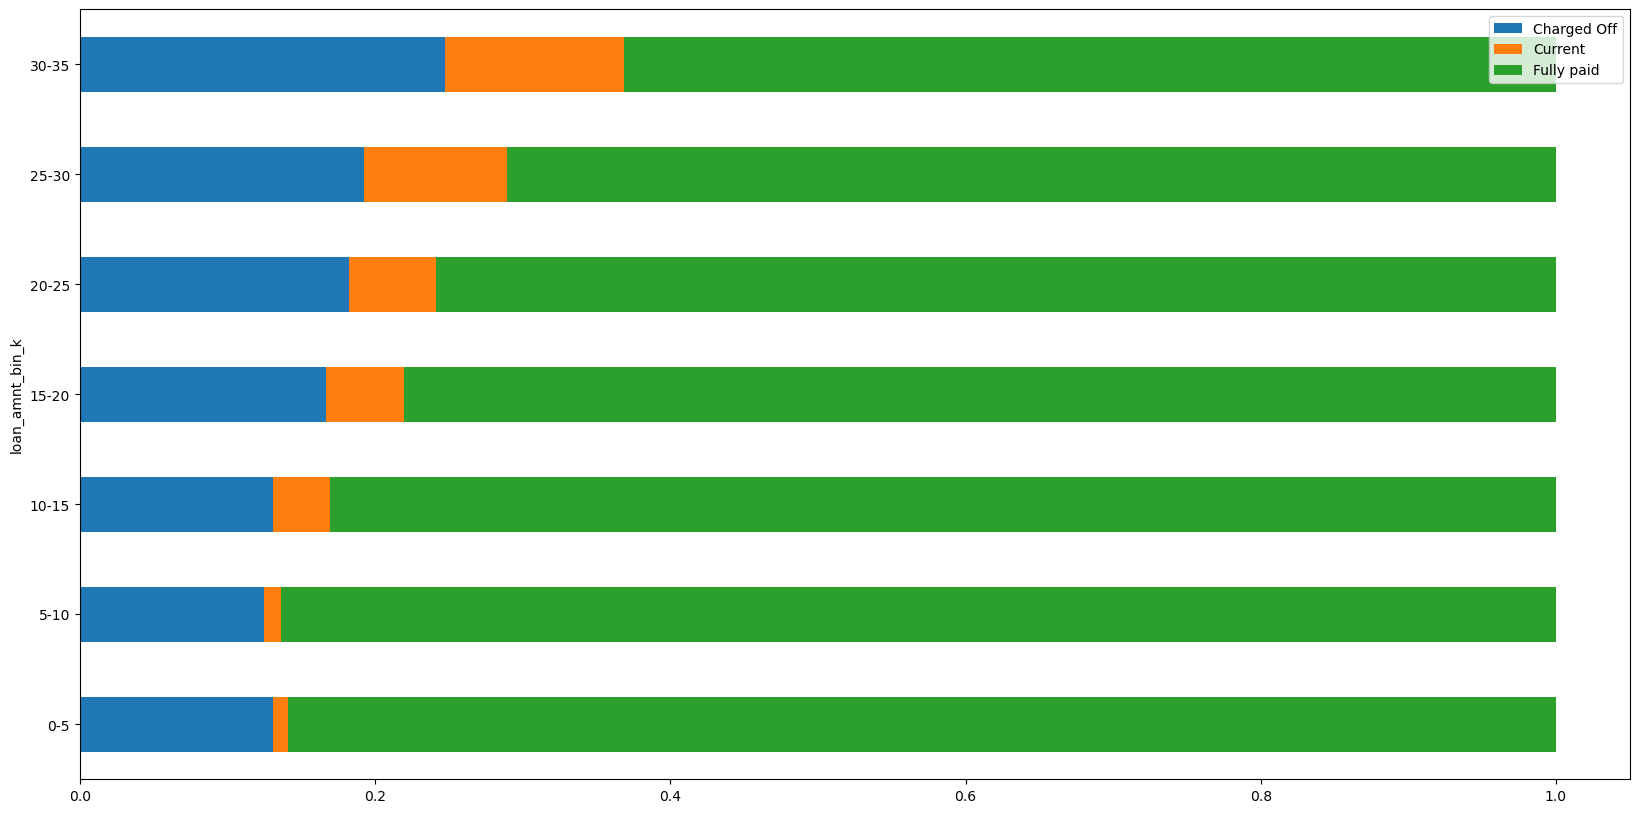

In [58]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['loan_amnt_bin_k'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>Highest percentage of people defaulted are taking loan amount between 30,000 to 35000.

##### installment_bin_100s Vs loan_status:

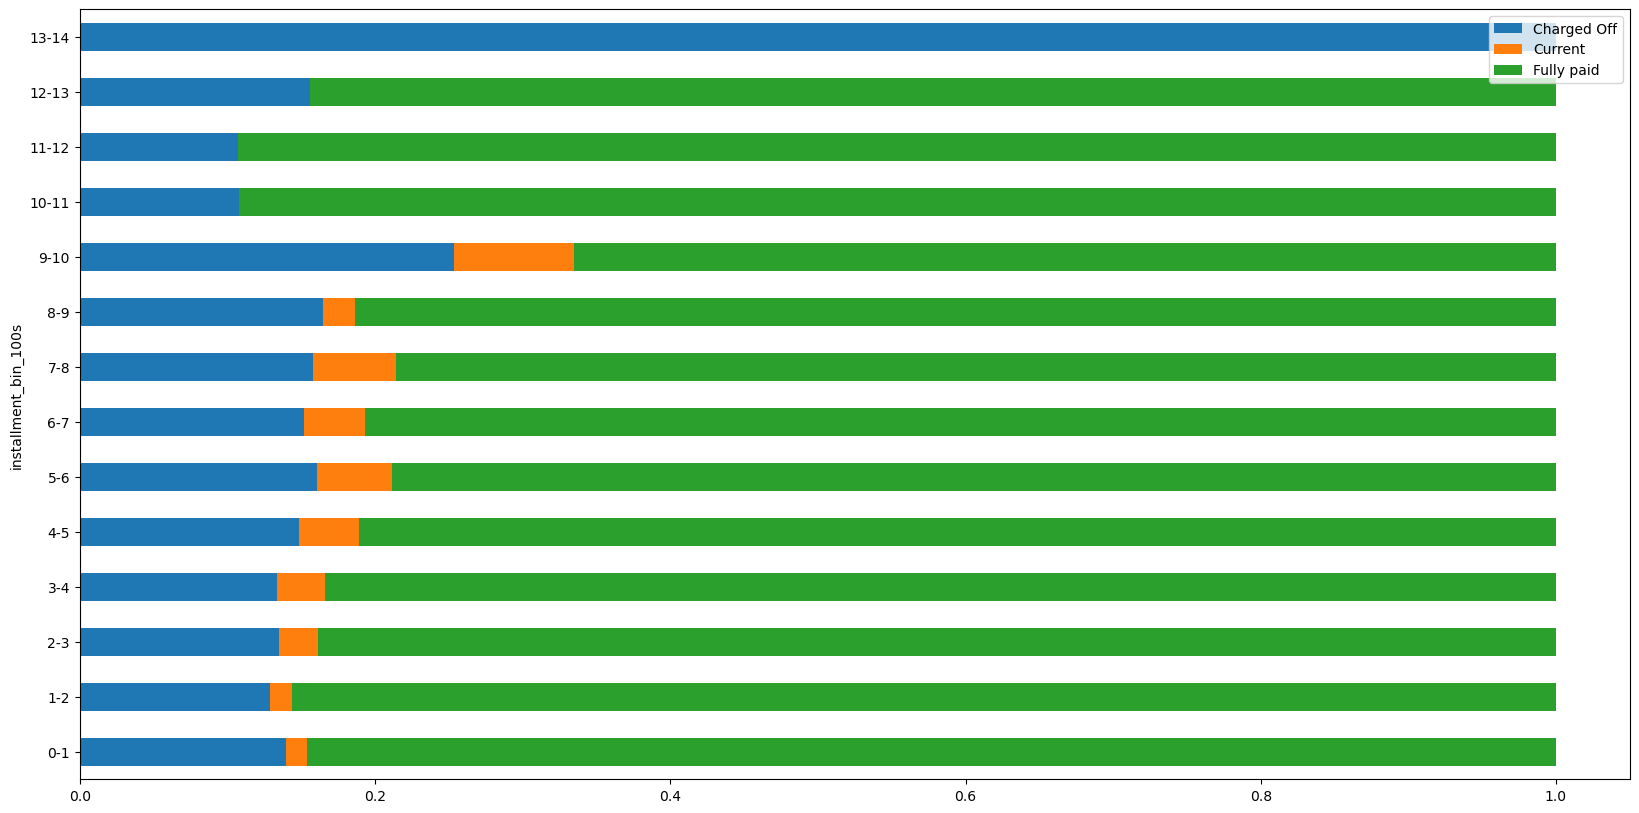

In [59]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['installment_bin_100s'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>The average or percentage of number of people likely  defaulted are from installment paying between 1300 to 1400, the next most defaulted group is paying 900 to 1000 installment.
And members paying 1100 to 1200 installment have highest  percentage fully paid.

##### sub_grade Vs loan_status:

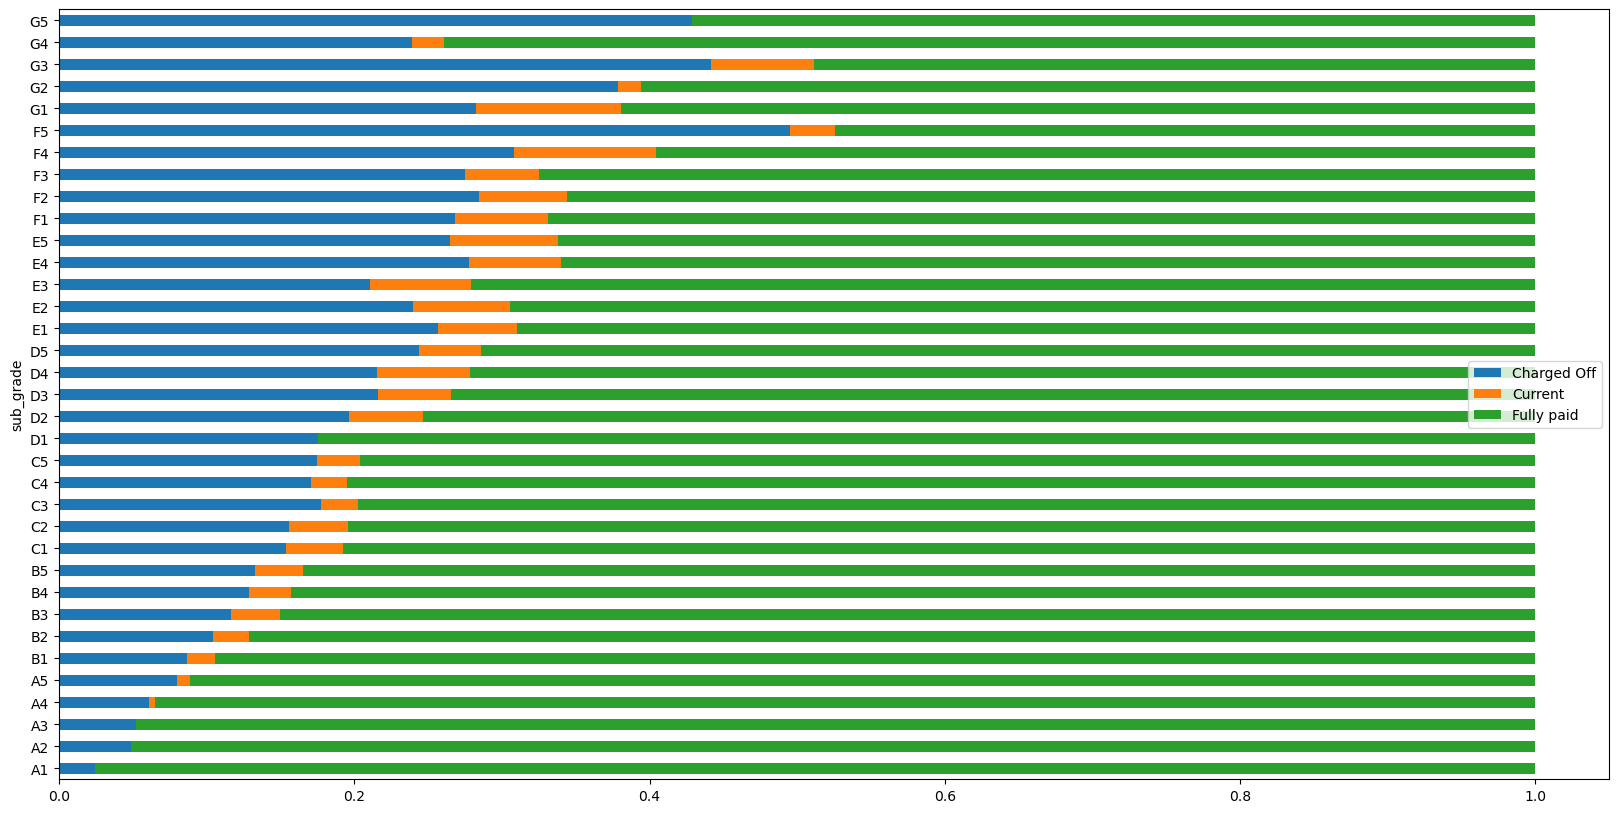

In [60]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['sub_grade'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>Most defaulted sub_grad members are from <b>F5</b> and most fully paid members are from <b>A1</b>.

##### home_ownership Vs loan_status:

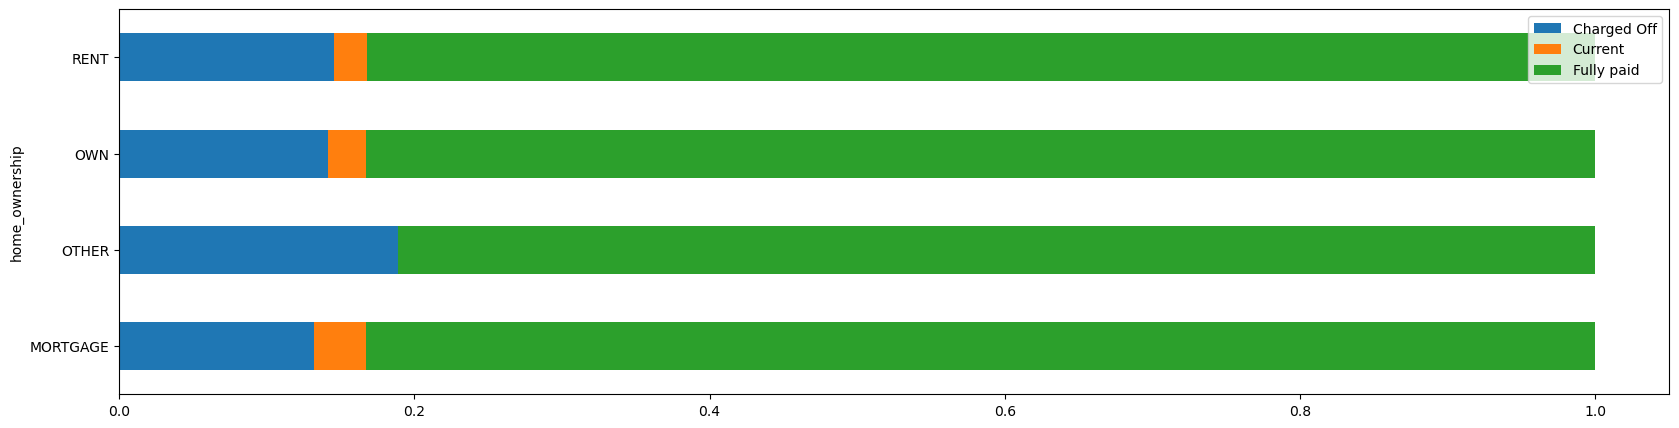

In [61]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['home_ownership'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.show()

*From the above plot home_ownership the members who belongs to <b>other</b> category are most defaulters. But there is not much difference in other categories.*

##### annual_inc_bin_k Vs loan_status:

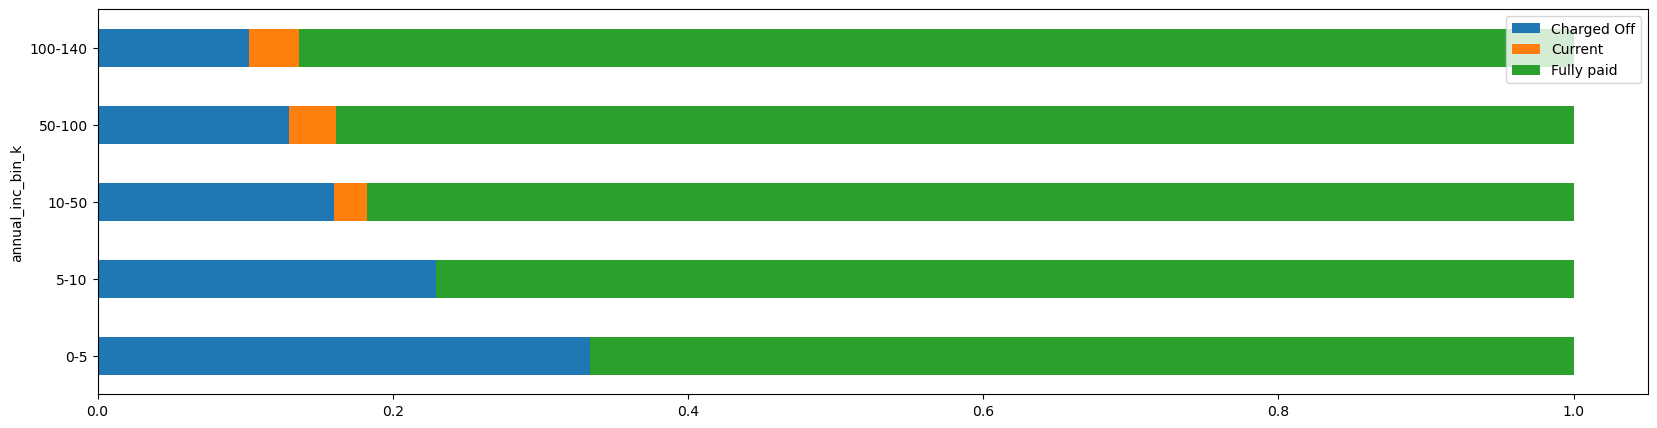

In [62]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['annual_inc_bin_k'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.show()

<font color='blue'>Members earning less then 5000 are most defaulters, and members earning more then 100000 are most fully paid.

#####  year_issue_d Vs  loan_status::

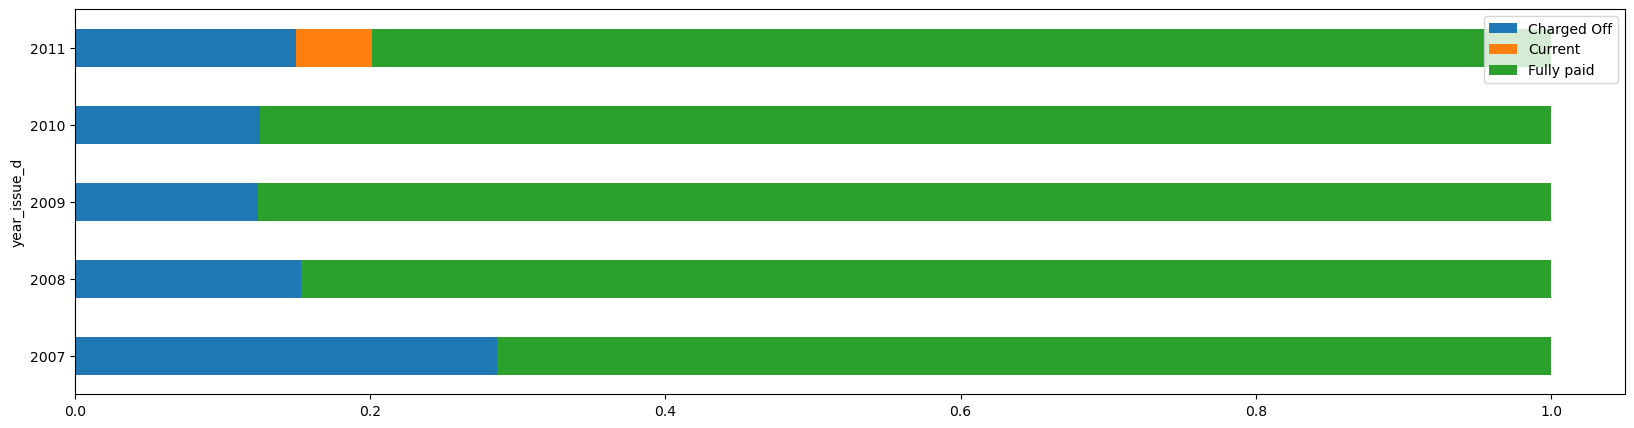

In [63]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['year_issue_d'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.show()

<font color='blue'>The members with loans issued in 2007 are most defaulters. And there is no active loans which issued before 2011

#####  month_issue_d Vs  loan_status::

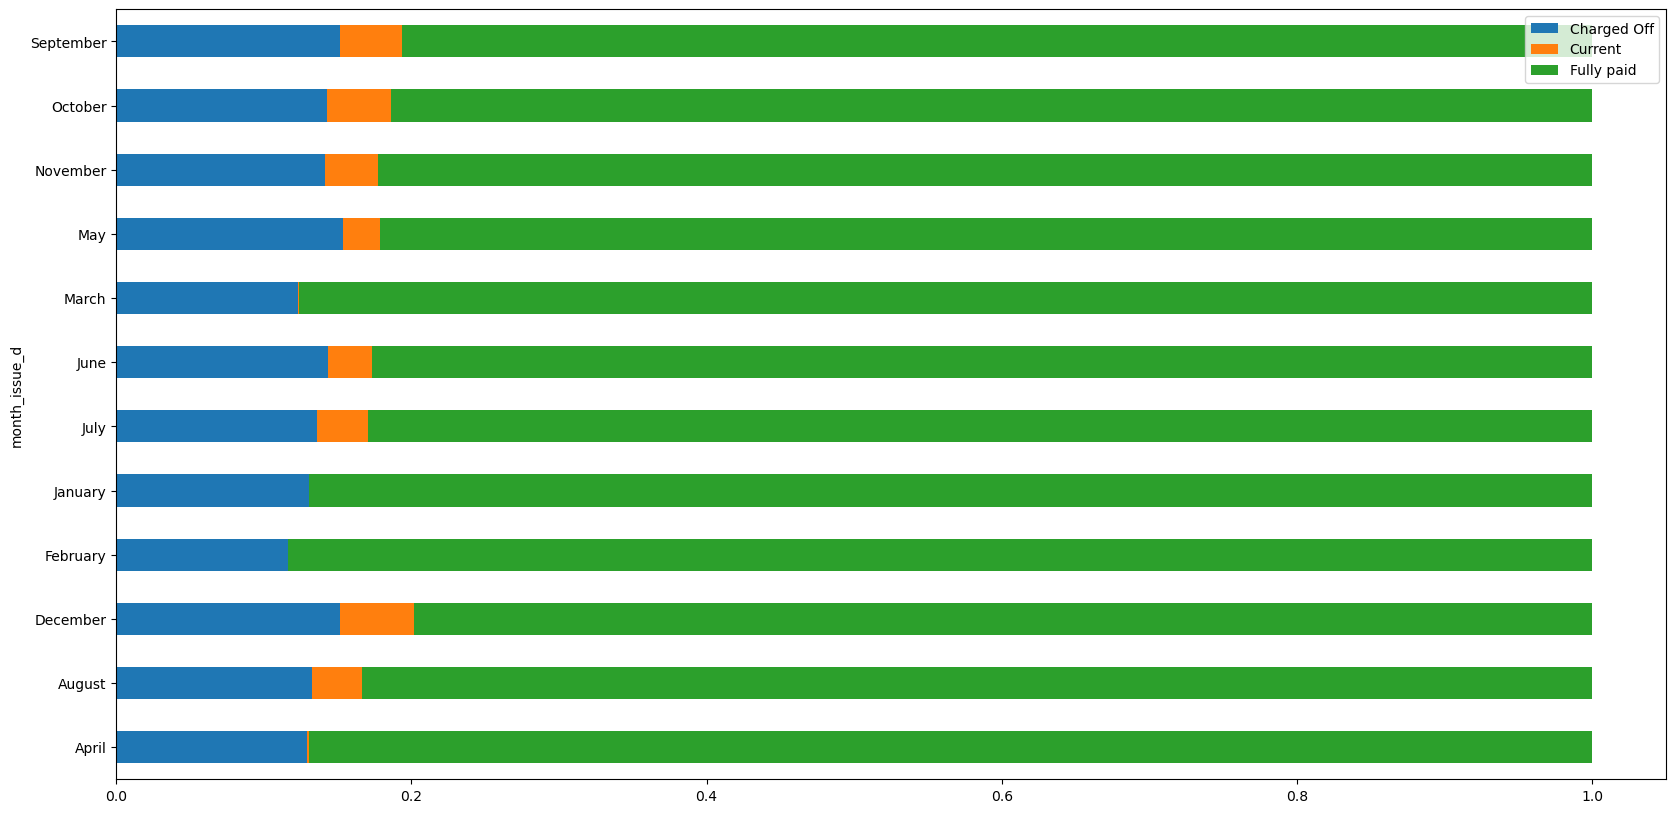

In [64]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['month_issue_d'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>As per observation from month if loan issued there is not much difference in percentage of defaulters. 
But loans issued in January, February, March, April months are not currently active. this might be due to the financial year ending period for the members

##### verification_status Vs  loan_status:

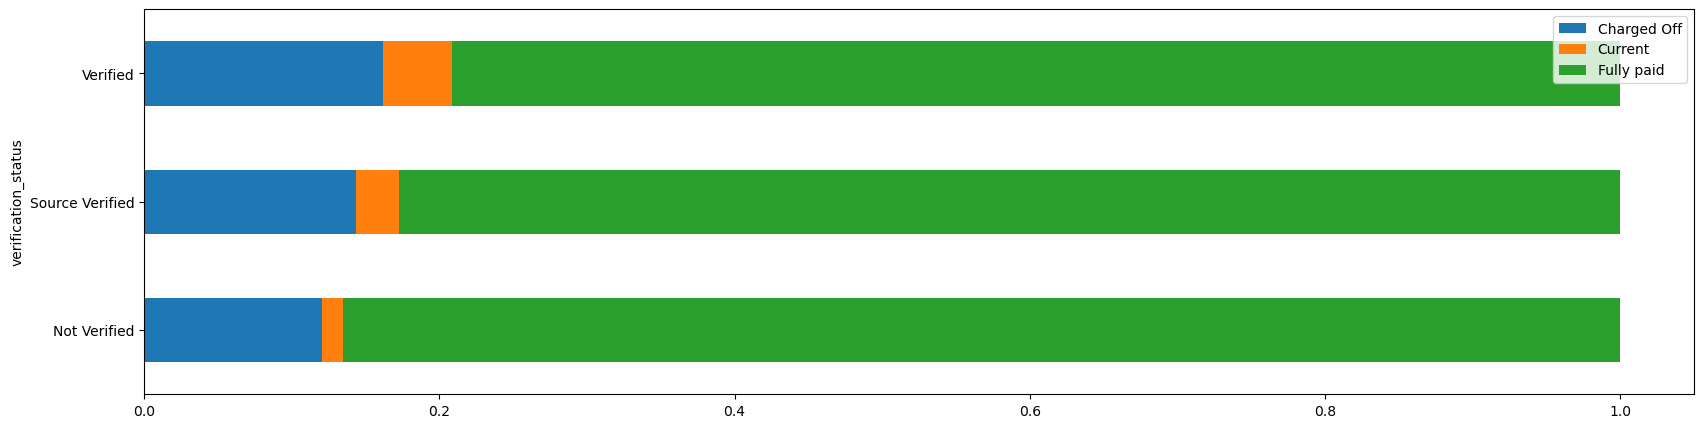

In [65]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['verification_status'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.show()

<font color='blue'>Verified members are most defaulters and not verified members are paid full amount.*

##### purpose Vs  loan_status:

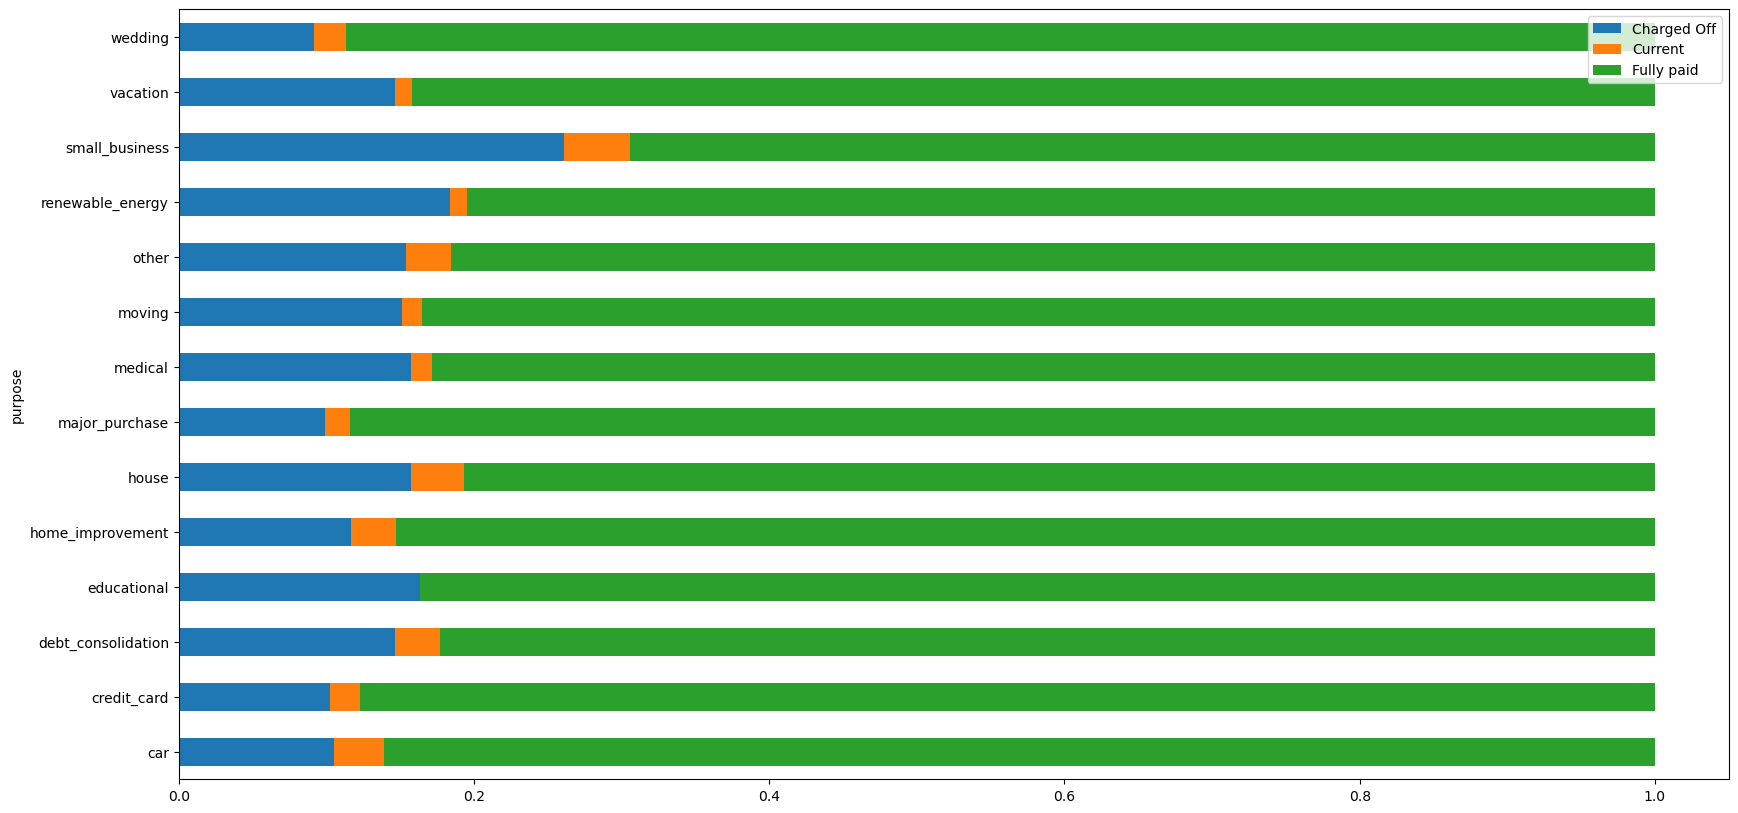

In [66]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['purpose'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.show()

<font color='blue'>As per above plot we can observe that loan taken for small business members are most defaulters, this might be due to loss in business. 
And most fully paid people are taken loan for wedding expenses, this might be due to they are well planned for wedding

##### addr_state Vs  loan_status:

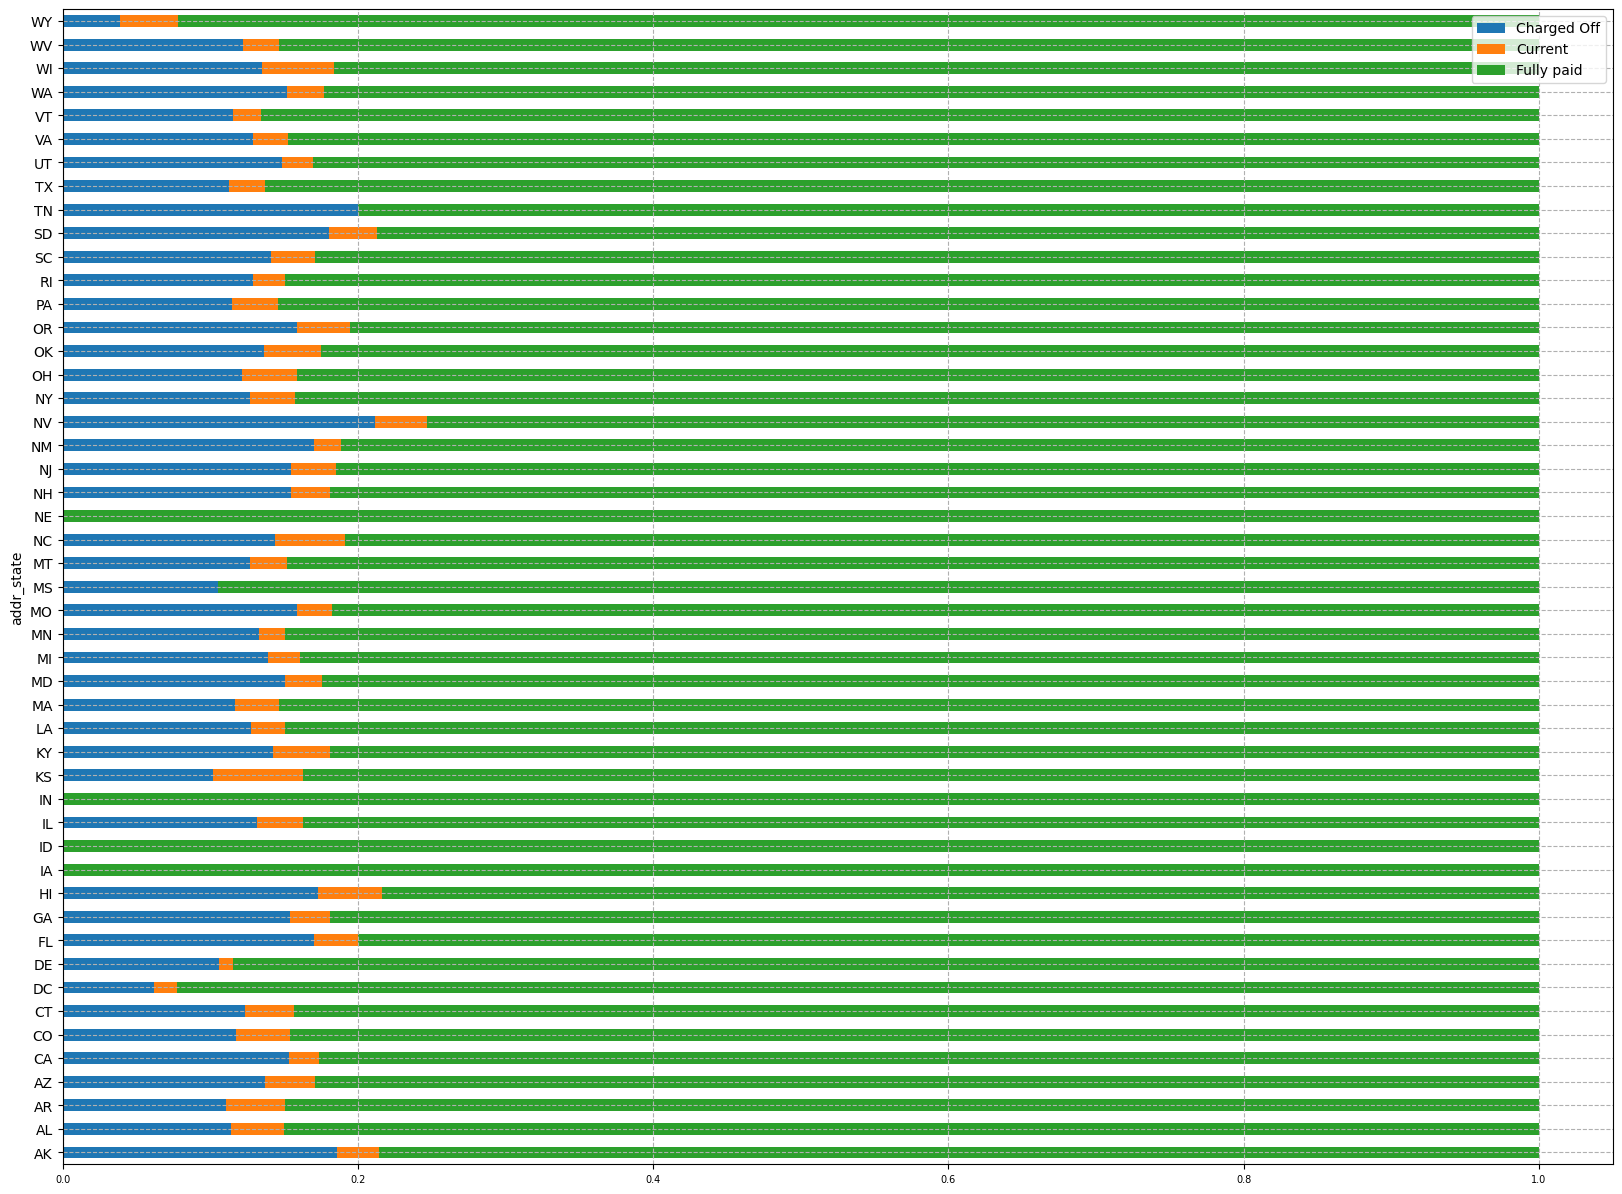

In [67]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['addr_state'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,15))
plt.xticks(fontsize=7)
plt.grid(linestyle='--')
plt.show()

<font color='blue'>Most average members are defaulted from state <b>NV</b>. And <b>NE</b>,<b>IN</b>,<b>ID</b>,<b>IA</b> state members are fully paid

##### desc_status Vs  loan_status:

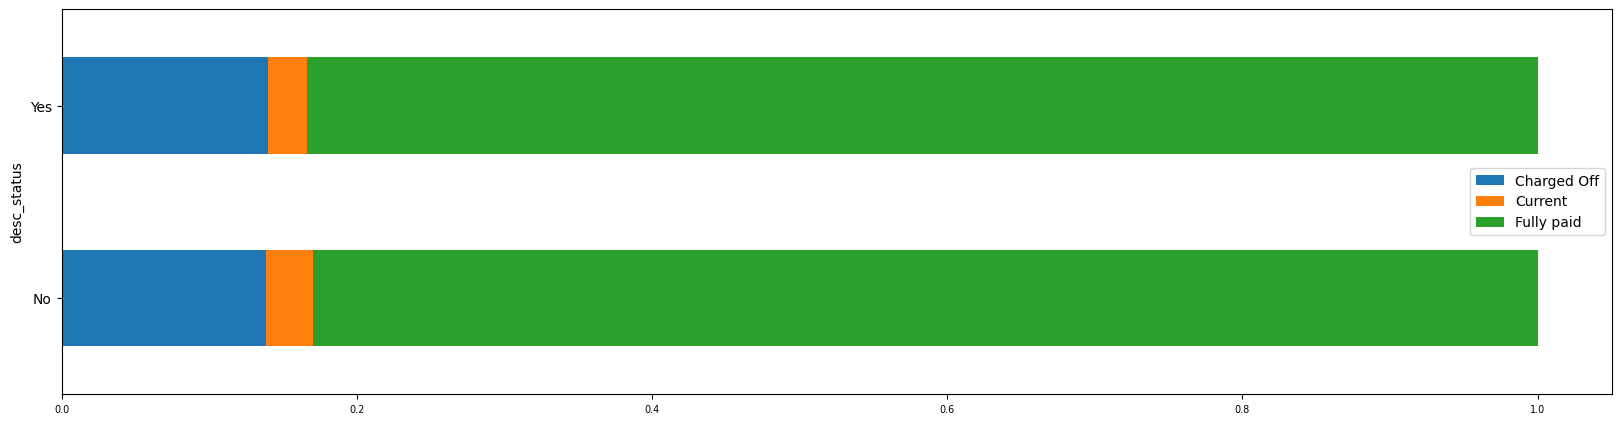

In [68]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid','Current'], index=['desc_status'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.xticks(fontsize=7)
plt.show()

##### term Vs  loan_status:

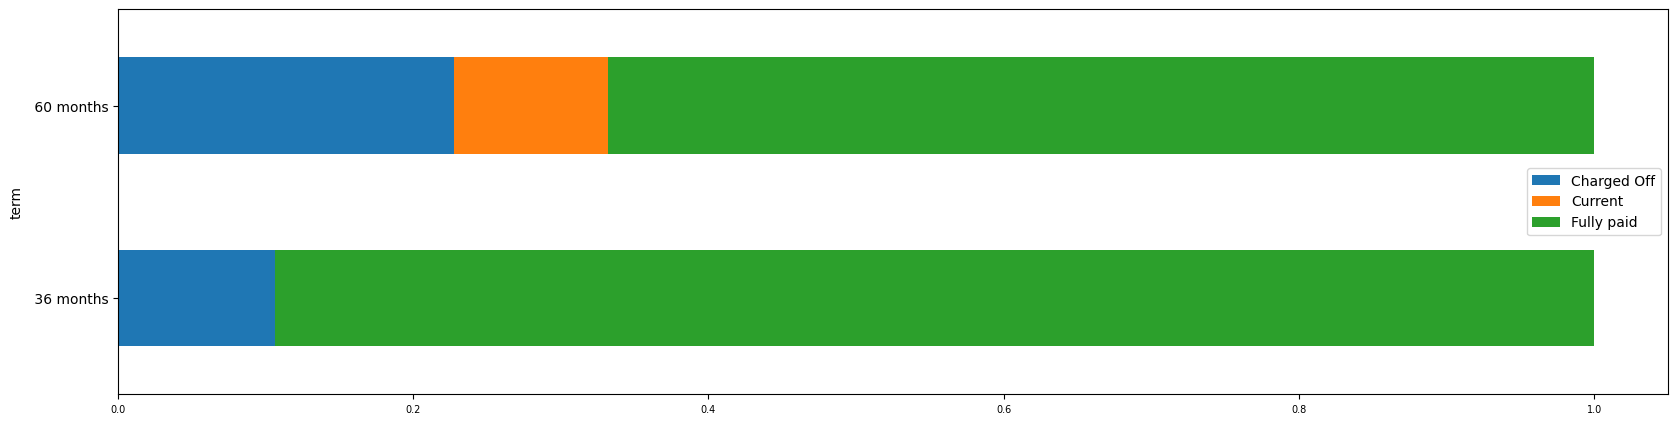

In [69]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['term'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.xticks(fontsize=7)
plt.show()

*Most average members are defaulted from loan term <b>60 months</b>(5years). And there are no active loans from 36 month term plan*

##### year_last_credit_pull_d Vs  loan_status:

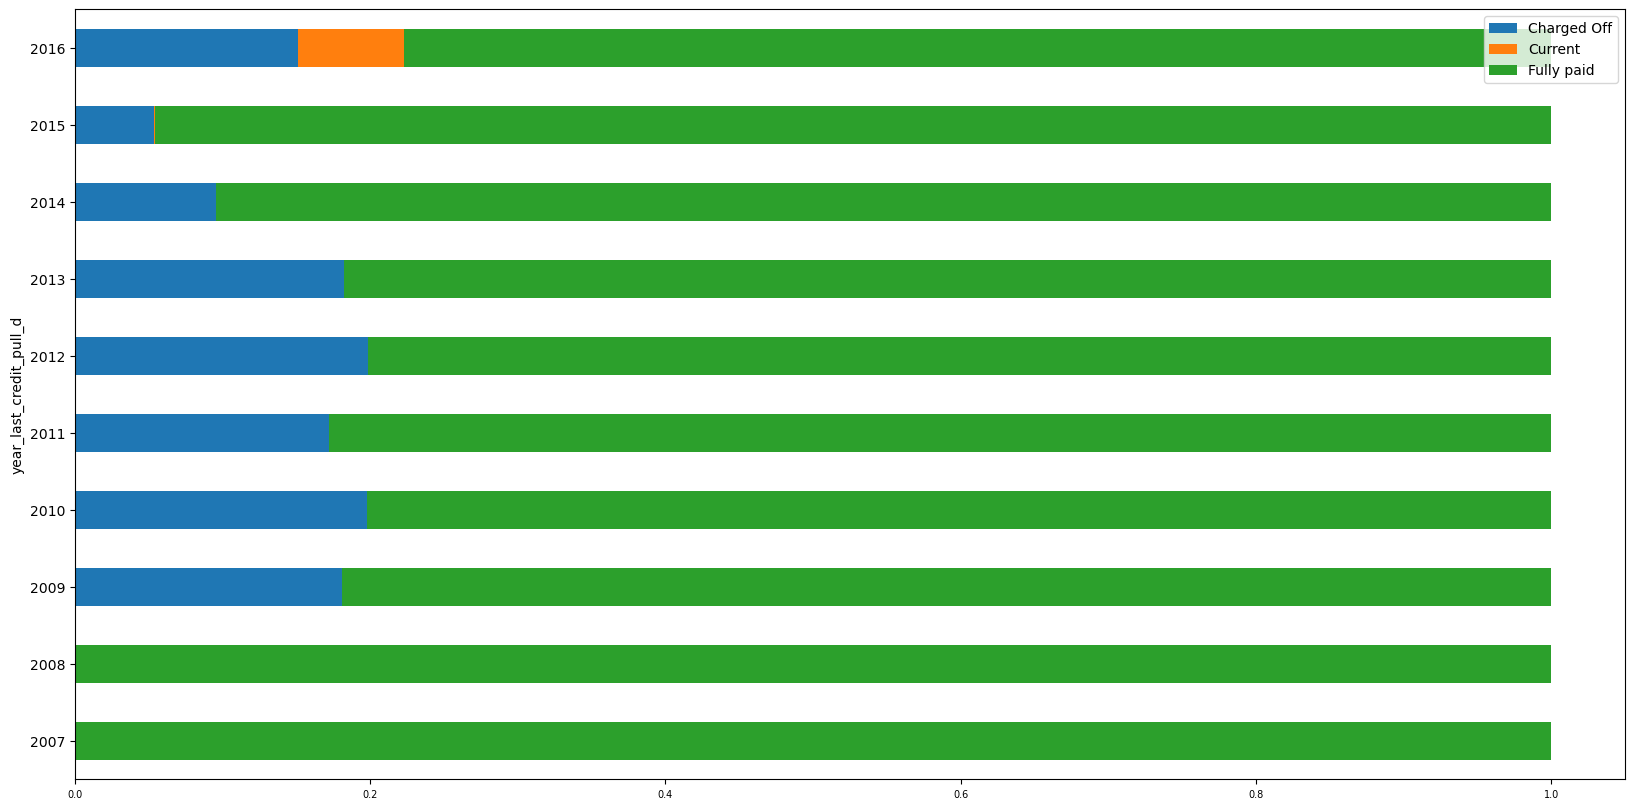

In [70]:

pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['year_last_credit_pull_d'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.xticks(fontsize=7)
plt.show()


##### dti_bin Vs  loan_status:

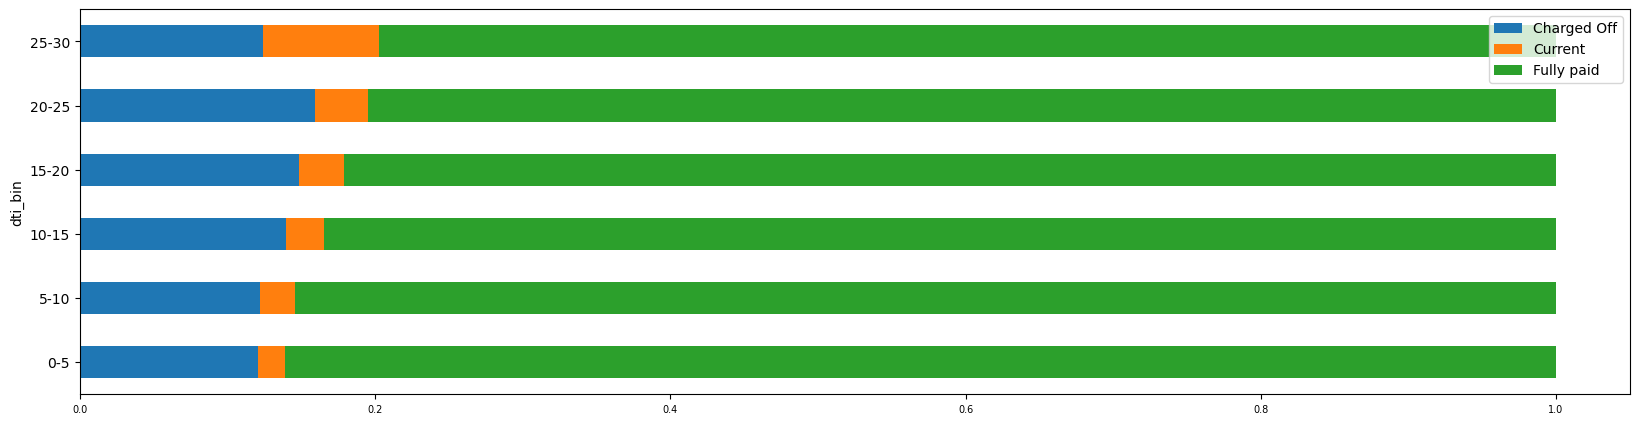

In [71]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['dti_bin'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,5))
plt.xticks(fontsize=7)
plt.show()

<font color='blue'>Members having least Debit-To-Income ratio are most trusteble and members having DTI between <b>20-25</b> are most avarage defaulters

##### open_acc_bin Vs  loan_status:

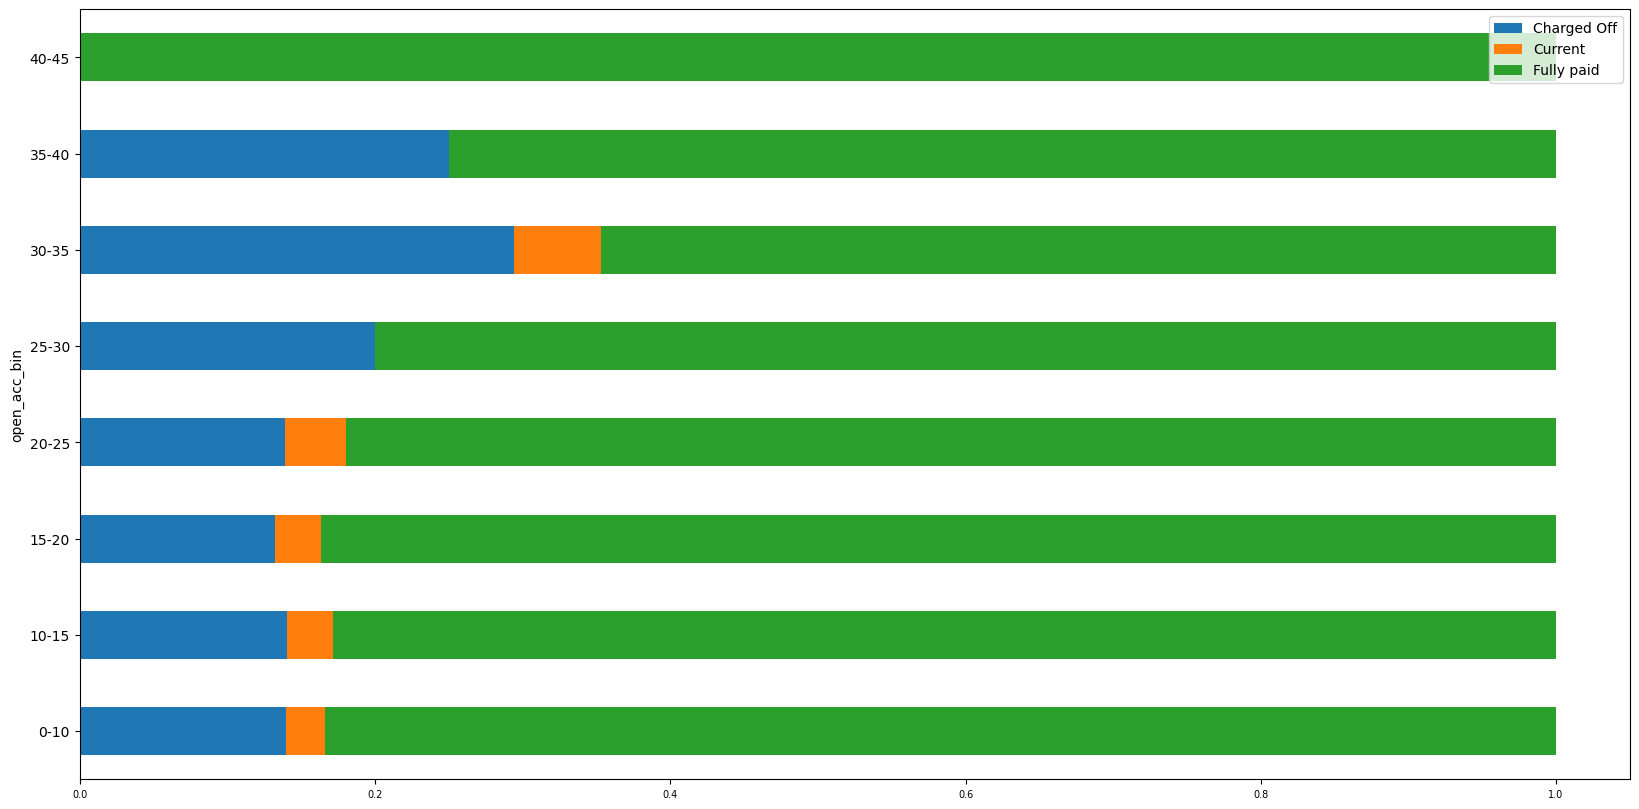

In [72]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['open_acc_bin'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.xticks(fontsize=7)
plt.show()


##### revol_util_bin Vs  loan_status:

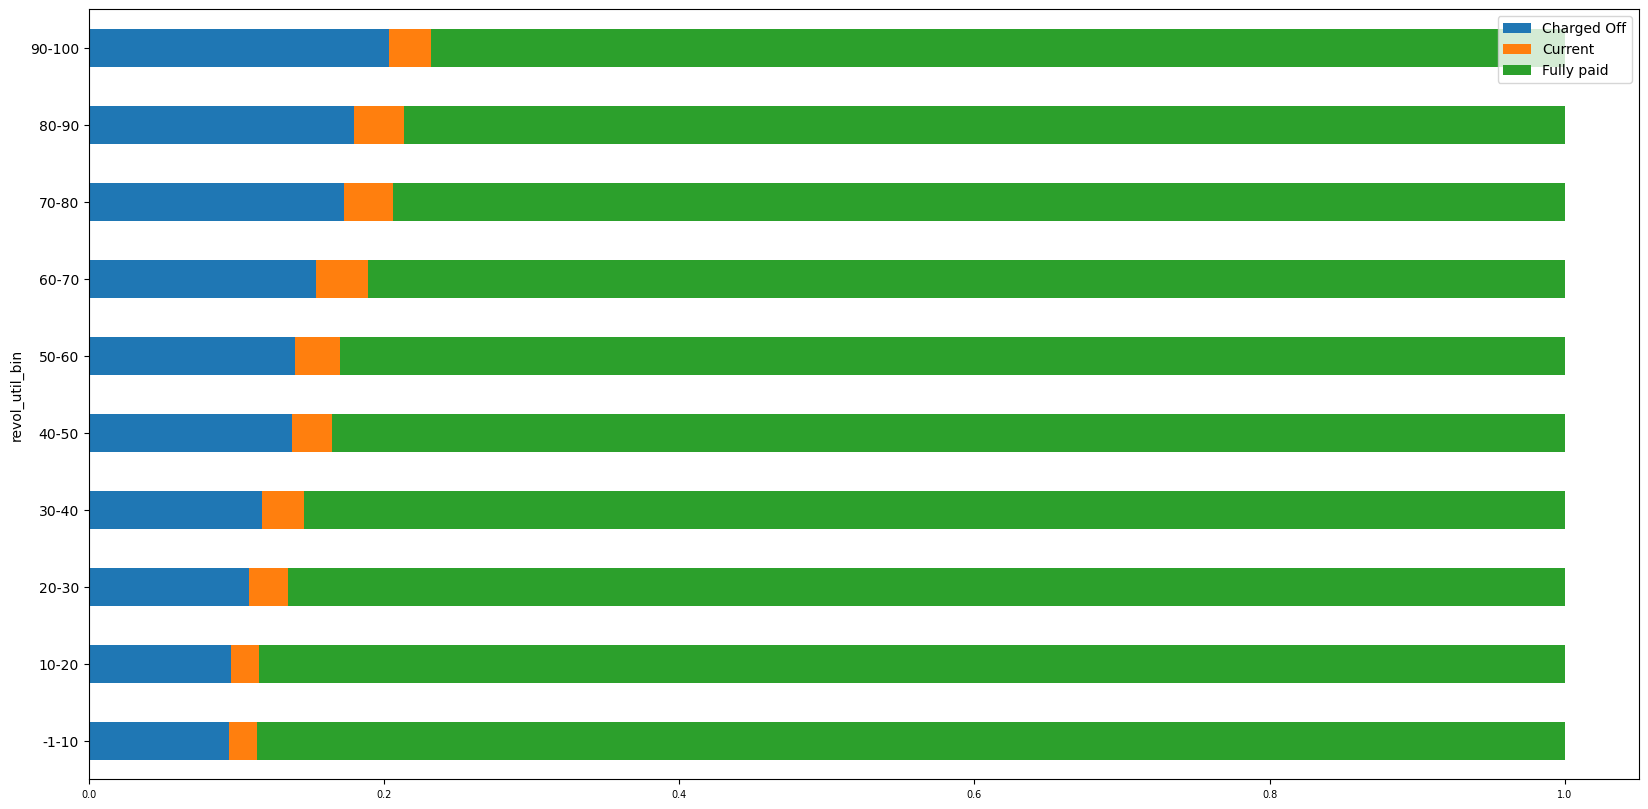

In [73]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['revol_util_bin'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.xticks(fontsize=7)
plt.show()


<b><font color='blue'>More the revolving line utilization rate more likly the member becomes defaulter
Highest percentage of defaulters having revol-util-rate 90% to 100%
Highest percentage of fully paid members having revol-util-rate 0 to 10%

##### year_last_pymnt_d Vs  loan_status:

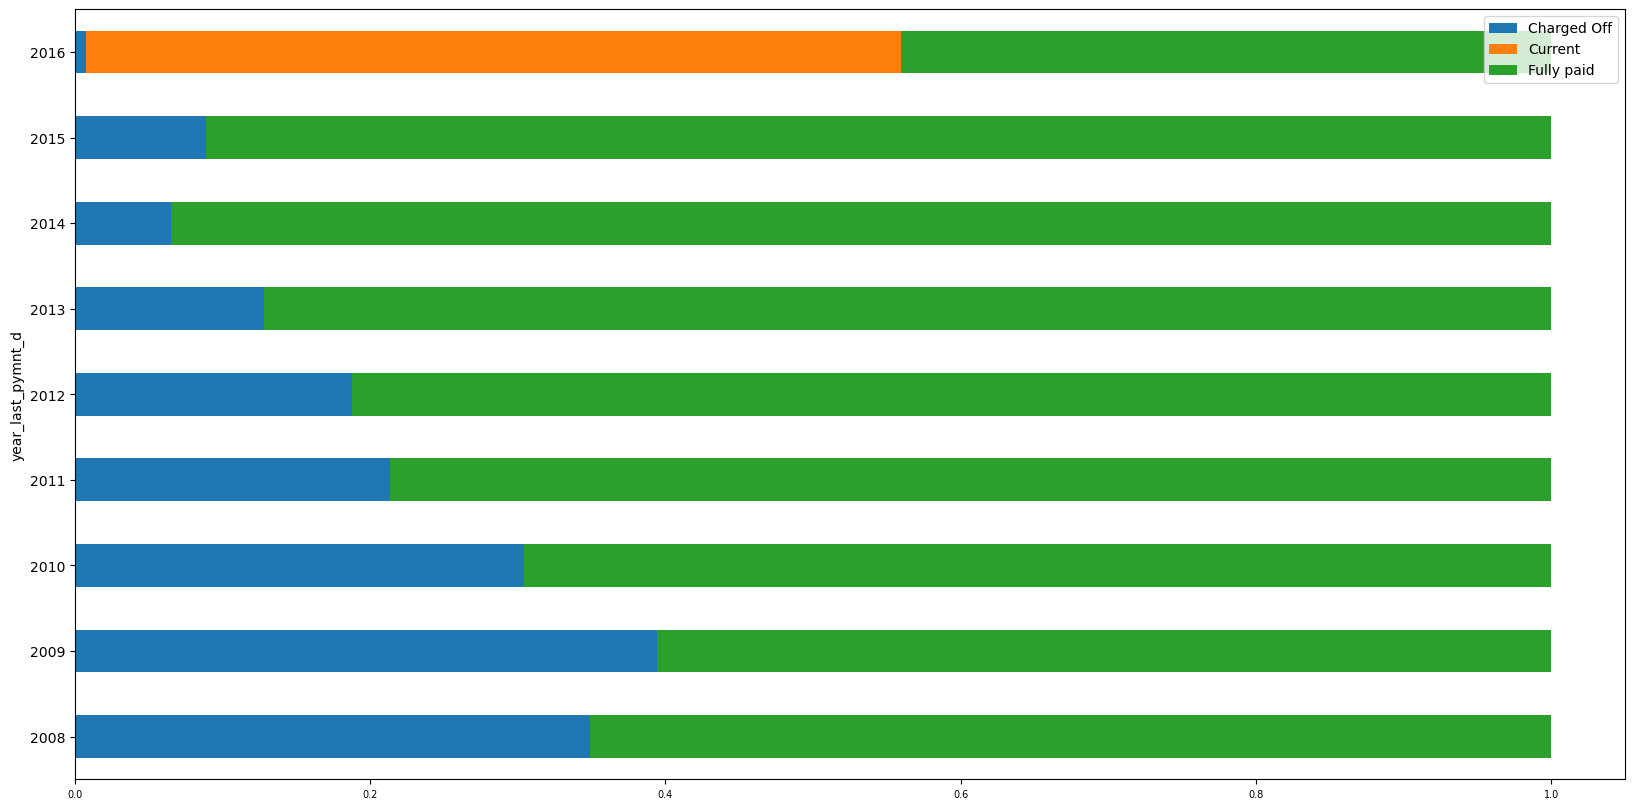

In [74]:
pt = pd.pivot_table(df_lender, values=['Charged Off','Fully paid', 'Current'], index=['year_last_pymnt_d'], aggfunc="mean")#  columns=['emp_length']
pt.plot.barh(stacked=True, figsize=(20,10))
plt.xticks(fontsize=7)
plt.show()

<font color='blue'>The members last payment date was in <b>2009</b> are most defaulters
And members whose  last payment year was in 2016 are having least percentage of defaulters but they are currently active and paying loan term*

## Bivariate Analysis:

Bivariate analysis helps in understanding patterns or variations between 2 or more entries or attributes. In our case the main aim is to find parameters which need to be considered for loan sanction. To get these information we need to analyze multiple parameters which affecting loan_status.

### Bivariate analysis on continuous variables:
To understand the correlation between continuous variables with respect to loan status as follows.

### Continuous variables:

To analyse correleation between continuous variables. We can split dataframe to three parts based on loan status for easy analysis.

In [75]:
df_lender_charged_off = df_lender[df_lender.loan_status=='Charged Off']
df_lender_fully_paid = df_lender[df_lender.loan_status=='Fully Paid']
df_lender_current = df_lender[df_lender.loan_status=='Current']

##### revol_util Vs open_acc:

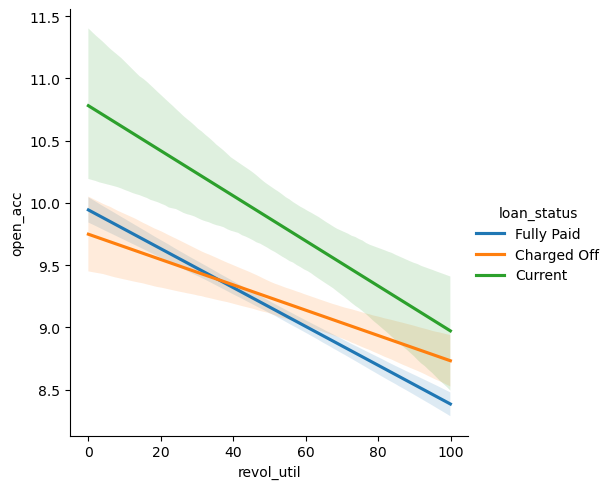

Correlation on Charged off : -0.06349484823741514
Correlation on Fully paid : -0.10205707880464951


In [76]:
sns.lmplot(data=df_lender, x='revol_util', y='open_acc', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_util.corr(df_lender_charged_off.open_acc))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_util.corr(df_lender_fully_paid.open_acc))


<b><font color='blue'>The correlation is negative 
 
 - <font color='blue'>High for members Fully paid group
 - <font color='blue'>Low for Charged off group

##### revol_util Vs annual_inc:

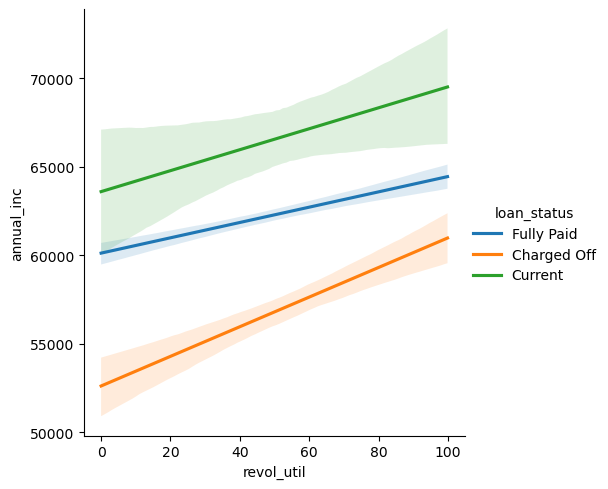

Correlation on Charged off : 0.08799104738789995
Correlation on Fully paid : 0.0439069803670188


In [77]:
sns.lmplot(data=df_lender, x='revol_util', y='annual_inc', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_util.corr(df_lender_charged_off.annual_inc))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_util.corr(df_lender_fully_paid.annual_inc))

<b><font color='blue'>The correlation is positive between revol_util and anuual_inc and 
 - <font color='blue'>Low for Fully paid memners
 - <font color='blue'>High for Charged of members

##### dti Vs annual_inc:

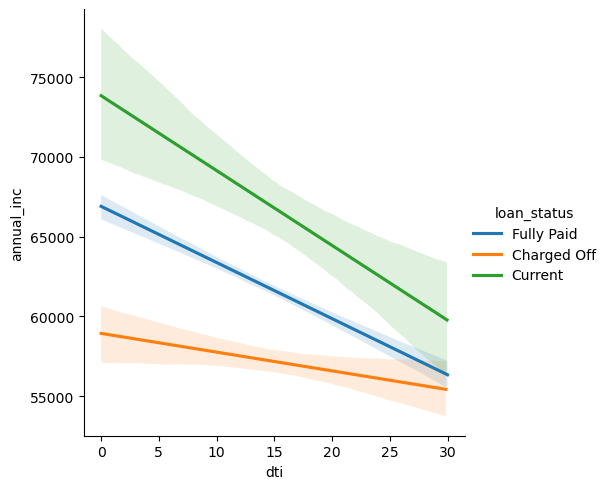

Correlation on Charged off : -0.02913452414793351
Correlation on Fully paid : -0.08435048526126504


In [78]:
sns.lmplot(data=df_lender, x='dti', y='annual_inc', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.dti.corr(df_lender_charged_off.annual_inc))
print("Correlation on Fully paid :", df_lender_fully_paid.dti.corr(df_lender_fully_paid.annual_inc))

*<b><font color='blue'>Correlation is negative, 
 - <font color='blue'>High for Fully paid members.
 - <font color='blue'>Low for Charged of members

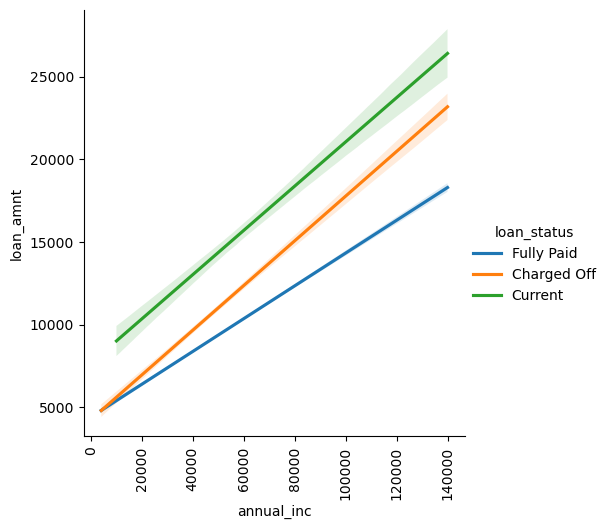

Correlation on Charged off : 0.4526116335579584
Correlation on Fully paid : 0.3991178172573377


In [79]:
sns.lmplot(data=df_lender, x='annual_inc', y='loan_amnt', hue ='loan_status', scatter=False)
plt.xticks(rotation=90)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.loan_amnt.corr(df_lender_charged_off.annual_inc))
print("Correlation on Fully paid :", df_lender_fully_paid.loan_amnt.corr(df_lender_fully_paid.annual_inc))


<b><font color='blue'>As per plot we can observe that correlation is positive and
 - <font color='blue'>Correleation is low for Fully paid members, means even more income members are opting for less loan amount this is a good sign for lenders.
 - <font color='blue'>On the other side Charged of members correlation is high means more the annual income more the loan amount this is not good*

##### revol_bal Vs annual_inc:

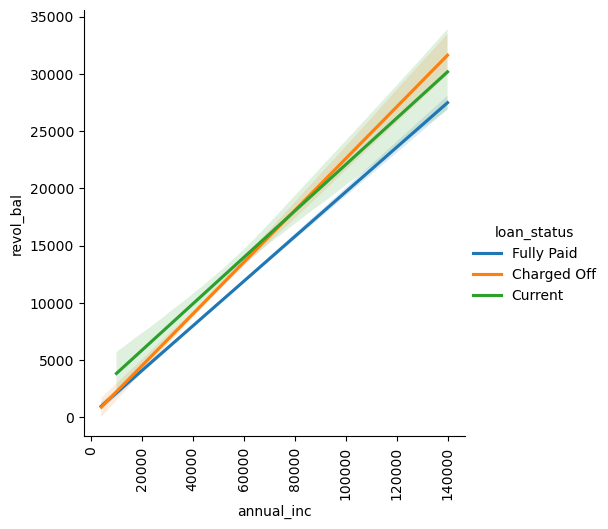

Correlation on Charged off : 0.4353345580020781
Correlation on Fully paid : 0.3937823364468562


In [80]:
sns.lmplot(data=df_lender, x='annual_inc', y='revol_bal', hue ='loan_status', scatter=False)
plt.xticks(rotation=90)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_bal.corr(df_lender_charged_off.annual_inc))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_bal.corr(df_lender_fully_paid.annual_inc))


<b><font color='blue'>Correleation between annual_inc and revol_bal shows that
 - <font color='blue'>Correlation is high for members likly defaulted.
 - <font color='blue'>Correlation is low for member who fully paid.

##### revol_util Vs revol_bal:

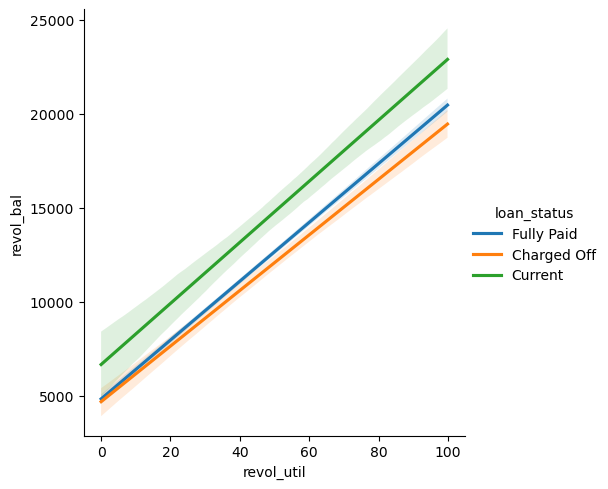

Correlation on Charged off : 0.2991288344076476
Correlation on Fully paid : 0.3204876092616245


In [81]:
sns.lmplot(data=df_lender, x='revol_util', y='revol_bal', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_bal.corr(df_lender_charged_off.revol_util))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_bal.corr(df_lender_fully_paid.revol_util))

*Correleation between annual_inc and revol_bal shows that
 - Correlation is high for members who fully paid.
 - Correlation is low for member who defaulted.*

##### revol_bal Vs open_acc:

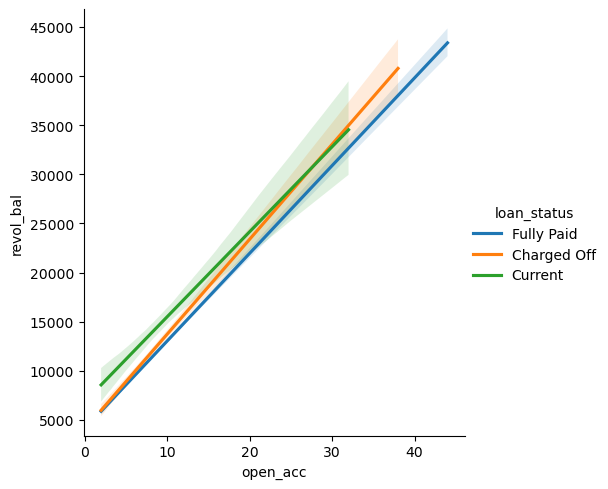

Correlation on Charged off : 0.2991288344076476
Correlation on Fully paid : 0.3204876092616245


In [82]:
sns.lmplot(data=df_lender, x='open_acc', y='revol_bal', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_bal.corr(df_lender_charged_off.revol_util))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_bal.corr(df_lender_fully_paid.revol_util))

*The correlation between open_acc and revol_bal shows that
 - Correlation is high for Fully paid members 
 - Correlation is low for Charged off members*

##### loan_amnt Vs revol_bal:

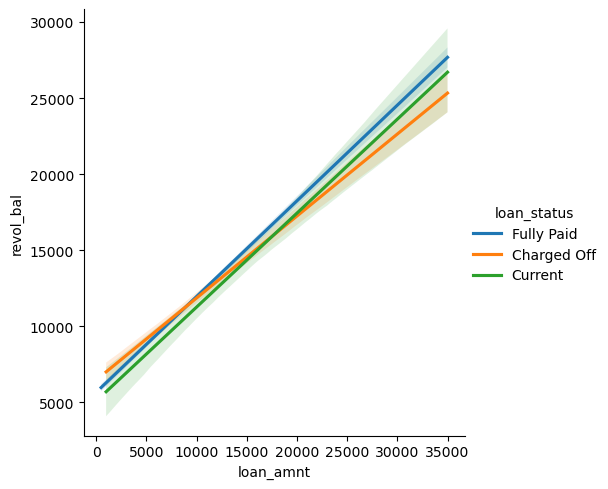

Correlation on Charged off : 0.30976176329408833
Correlation on Fully paid : 0.31554264579227254


In [83]:
sns.lmplot(data=df_lender, x='loan_amnt', y='revol_bal', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.revol_bal.corr(df_lender_charged_off.loan_amnt))
print("Correlation on Fully paid :", df_lender_fully_paid.revol_bal.corr(df_lender_fully_paid.loan_amnt))

*Not much difference in correlation between revol_bal and loan_amnt.*

##### installment vs revol_util:

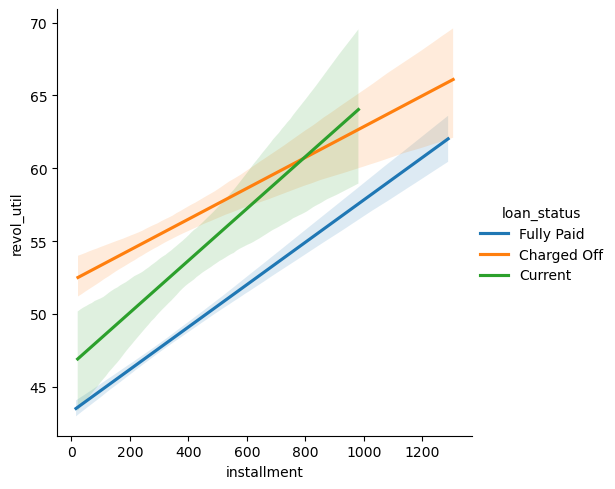

Correlation on Charged off : 0.07985627733393891
Correlation on Fully paid : 0.1020420988305679


In [84]:
sns.lmplot(data=df_lender, x='installment', y='revol_util', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.installment.corr(df_lender_charged_off.revol_util))
print("Correlation on Fully paid :", df_lender_fully_paid.installment.corr(df_lender_fully_paid.revol_util))

*Correlation between installment and revol_util shows that charged of members having less correlation compared with fully paid ones
*

##### installment Vs dti:

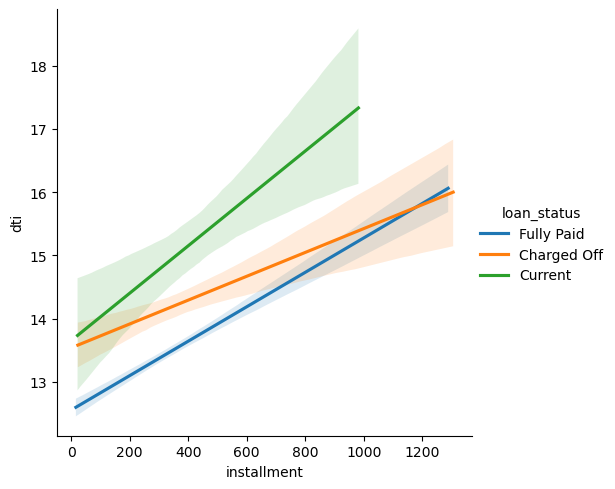

Correlation on Charged off : 0.06019005601911967
Correlation on Fully paid : 0.08077700232562433


In [85]:
sns.lmplot(data=df_lender, x='installment', y='dti', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.installment.corr(df_lender_charged_off.dti))
print("Correlation on Fully paid :", df_lender_fully_paid.installment.corr(df_lender_fully_paid.dti))

<b><font color='blue'>The correlation between installment and dti shows that
 - <b><font color='blue'>Correlation is high for Fully paid members 
 - <b><font color='blue'>Correlation is low for Charged off members

##### installment Vs monthly_inc

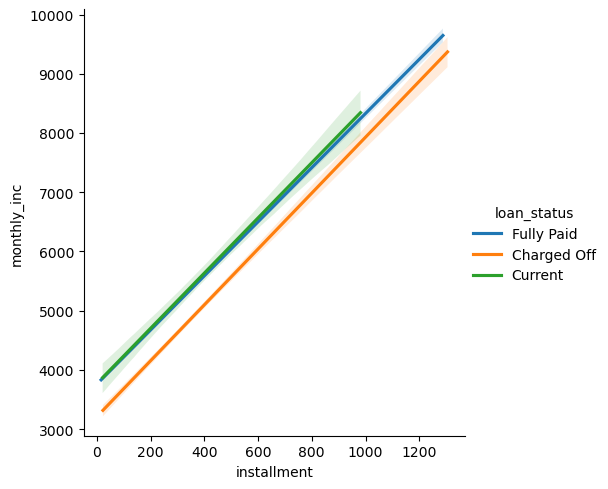

Correlation on Charged off : 0.4484880883761398
Correlation on Fully paid : 0.39013521401691365


In [86]:
sns.lmplot(data=df_lender, x='installment', y='monthly_inc', hue ='loan_status', scatter=False)
plt.show()
print("Correlation on Charged off :", df_lender_charged_off.installment.corr(df_lender_charged_off.monthly_inc))
print("Correlation on Fully paid :", df_lender_fully_paid.installment.corr(df_lender_fully_paid.monthly_inc))

<b><font color='blue'>Correlation between installment and monthly income shows that
    
 - <font color='blue'>Members with high correlation between monthly income installment amount likely Charged off, 
 - <font color='blue'>Members with low correlation between monthly income and installment are mostly filly paid.

### Continuous Catagorical:

##### int_bin Vs revol_util:

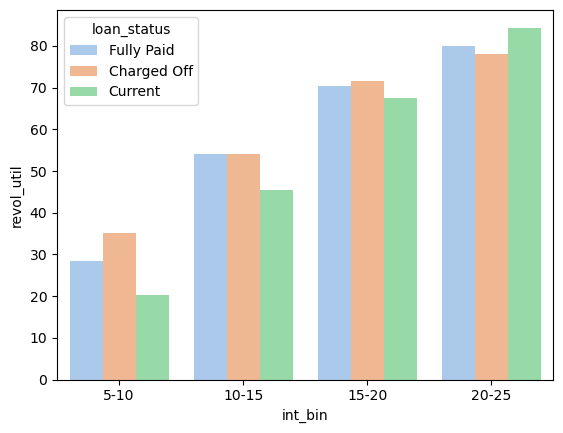

In [87]:
sns.barplot(data =df_lender ,y='revol_util', x='int_bin', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>The mean value of revol_util withrespect to interest bin shows that
- <font color='blue'>Members with high Revolving line utilization rate and high interest rate are charged off.
- <font color='blue'>and with low Revolving line utilization and low interest rate are fully paid.

##### int_bin Vs dti:

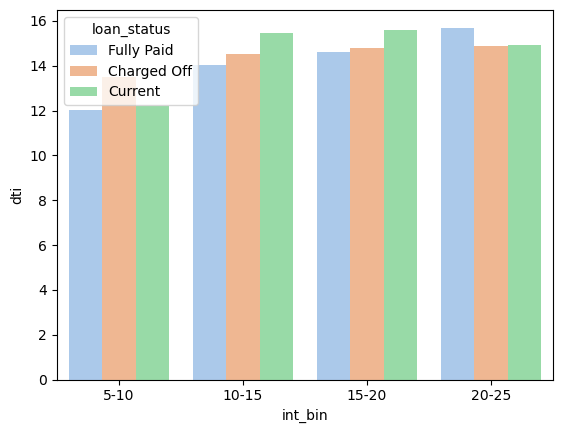

In [88]:
sns.barplot(data =df_lender ,y='dti', x='int_bin', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

##### loan_amnt_bin_k Vs revol_util:

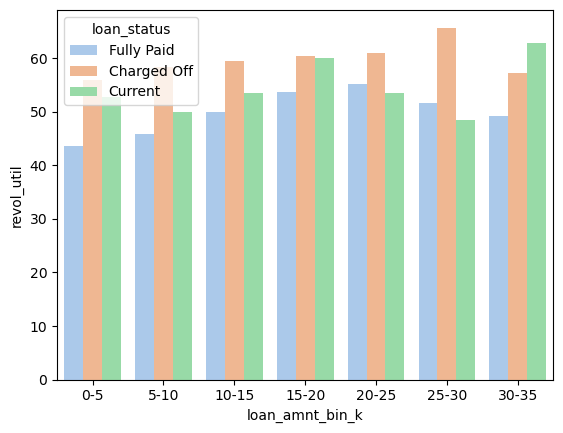

In [89]:
sns.barplot(data =df_lender ,y='revol_util', x='loan_amnt_bin_k', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

##### loan_amnt_bin_k Vs annual_inc:

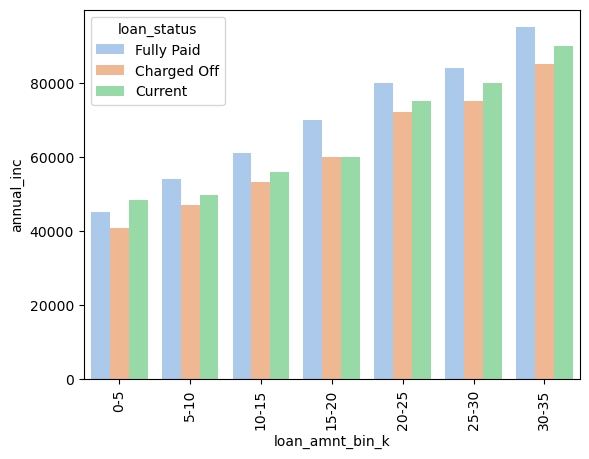

In [90]:
sns.barplot(data =df_lender ,y='annual_inc', x='loan_amnt_bin_k', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>The median value of annual income with respect to loan amount bins shows that
Members with high annual income have opted for higher loan amount and charged off.

#####  installment_bin_100s  Vs revol_util:

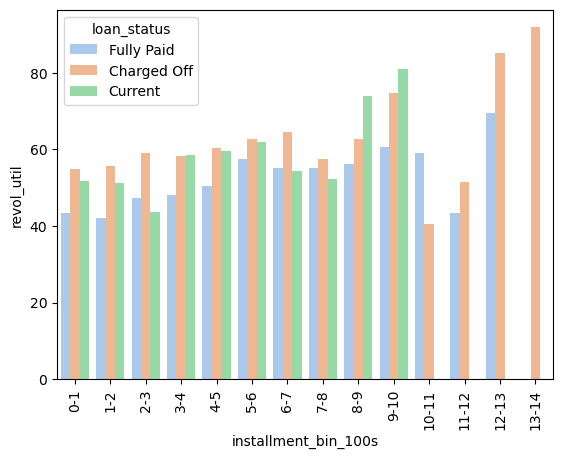

In [91]:
sns.barplot(data =df_lender ,y='revol_util', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>The median value of revolving line utilization rate with respect to installment bins shows that
members with higher revolving utilization rate and paying higher installment are charged off

##### installment_bin_100s  Vs open_acc:

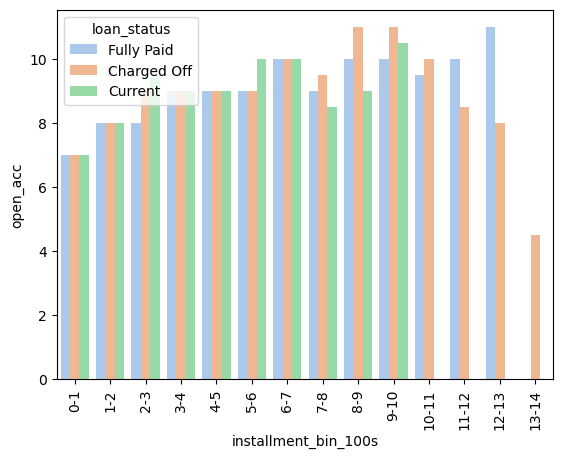

In [92]:
sns.barplot(data =df_lender ,y='open_acc', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

*The mean value of open_acc with respect to installment bins shows that
Members with high open credit lines and paying installment 1200 to 1300 are most charged off.*

##### installment_bin_100s Vs dti:

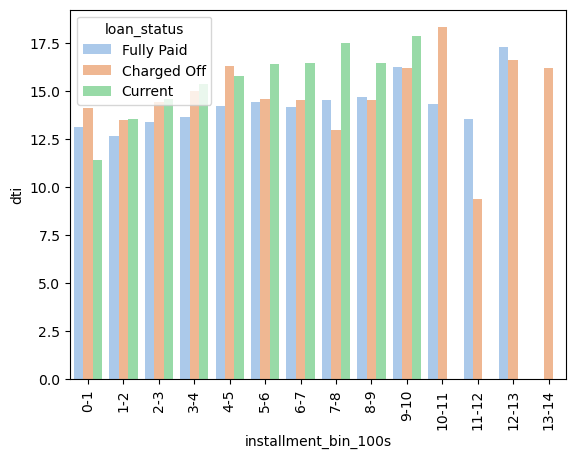

In [93]:
sns.barplot(data =df_lender ,y='dti', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None,estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>The median value of Debit-To-Income ratio with respect to installment bins shows that
Members with higher DTI and paying higher installments are most charged off

##### installment_bin_100s Vs annaul_inc:

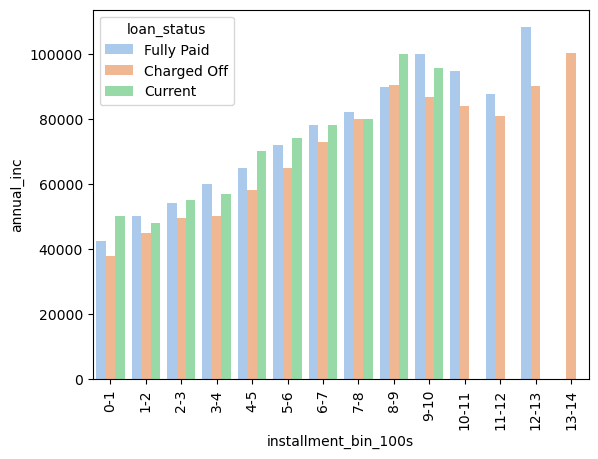

In [94]:
sns.barplot(data =df_lender ,y='annual_inc', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>The mean annual income is high for members who are paying installments between 1000 to 1100 and they are most Charged off.
From installment bin 1300 to 1400 all members are defaulters with more annual income.<font></b>

##### installment_bin_100s Vs loan_amnt:

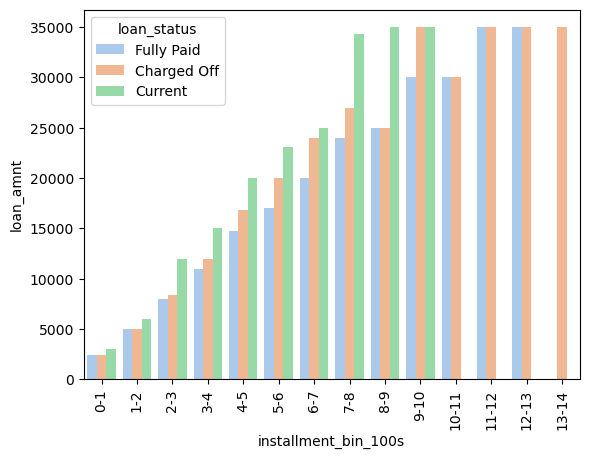

In [95]:
sns.barplot(data =df_lender ,y='loan_amnt', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>Member opted for high loan amount and paying high installments are most defaulters/Charged off<font/></b>

##### installment_bin_100s Vs total_acc:

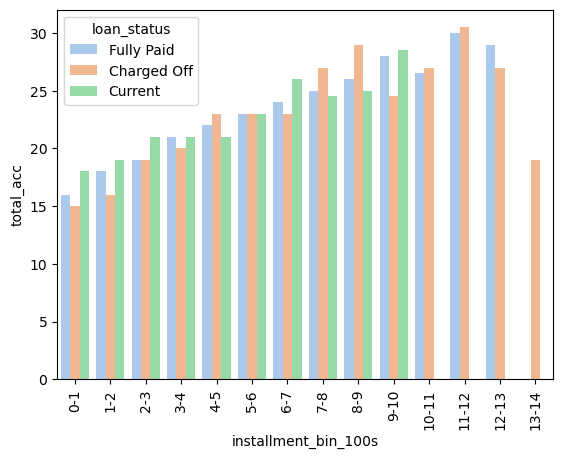

In [96]:
sns.barplot(data =df_lender ,y='total_acc', x='installment_bin_100s', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<b><font color='blue'>Members with more number of credit lines(total_acc) and paying higher installment amount are most likely Charged off</font></b>

##### grade Vs revol_util:

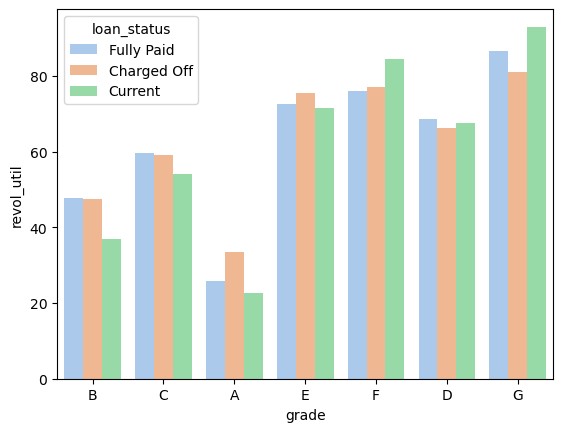

In [97]:
sns.barplot(data =df_lender ,y='revol_util', x='grade', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'>Members belongs to Grade <b>A</b> and having lower revolving utilization rate are less Charged off and Grade <b>G</b> members are most Charged off with Higher rate.

##### grade Vs annaul_inc:

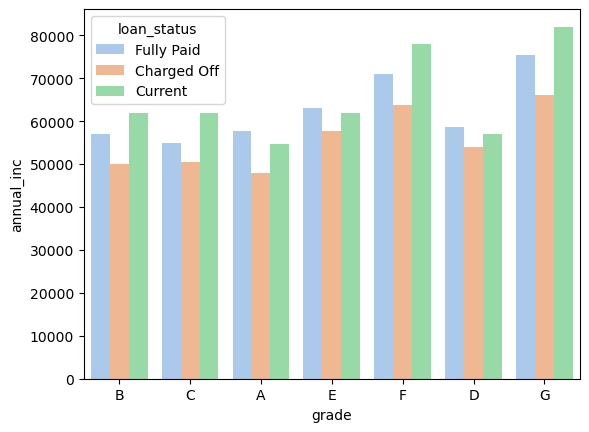

In [98]:
sns.barplot(data =df_lender ,y='annual_inc', x='grade', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'> Grade <b>G</b> members are most charged off people and they are highly paid employees.

##### grade Vs loan_amnt:

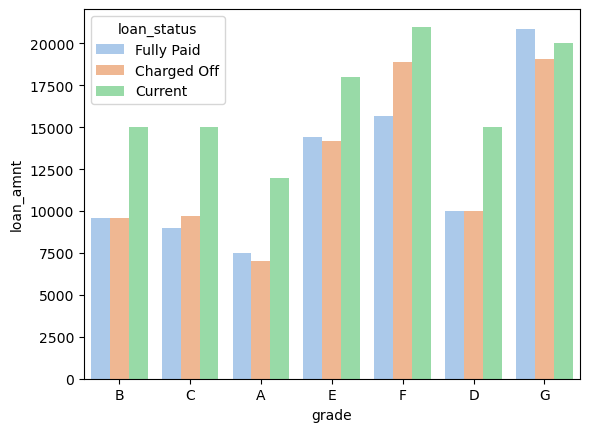

In [99]:
sns.barplot(data =df_lender ,y='loan_amnt', x='grade', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'> Grade <b>G</b> members are opted for higher loans and they are most charged off.

##### emp_length Vs anual_inc:

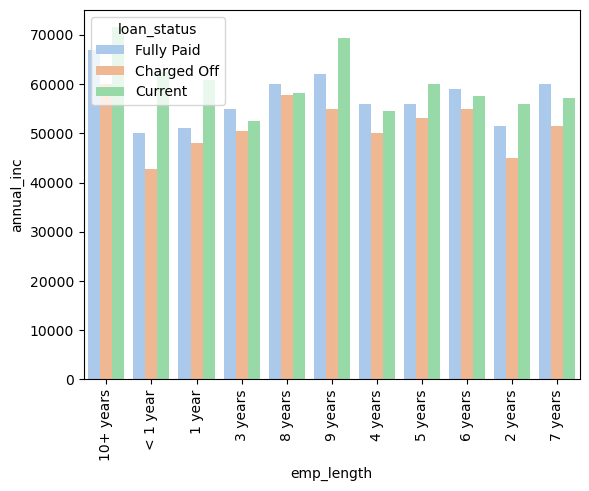

In [100]:
sns.barplot(data =df_lender ,y='annual_inc', x='emp_length', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

##### emp_length Vs loan_amnt:

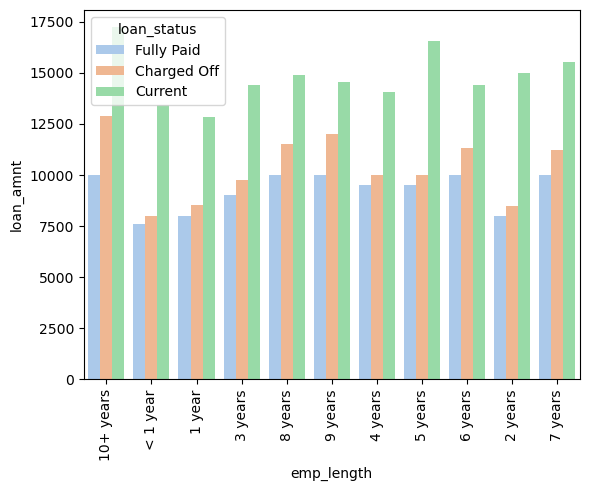

In [101]:
sns.barplot(data =df_lender ,y='loan_amnt', x='emp_length', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<font color='blue'> Members with low employment  length are opted for lower loan amount and they are least Charged off.
And members with high employment length are opted for higher loan amount and they are defaulters.

##### home_ownership Vs revol_util:

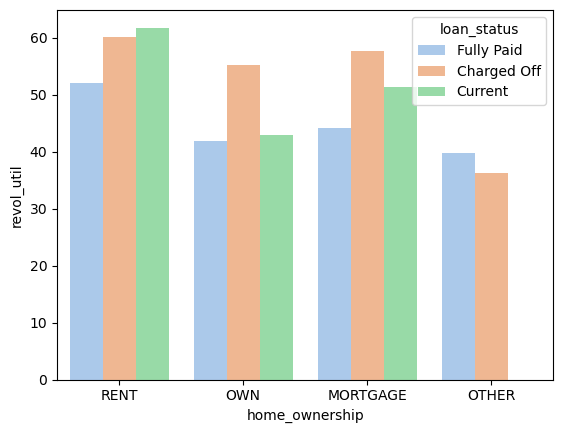

In [102]:
sns.barplot(data =df_lender ,y='revol_util', x='home_ownership', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

##### home_ownership Vs loan_amnt:

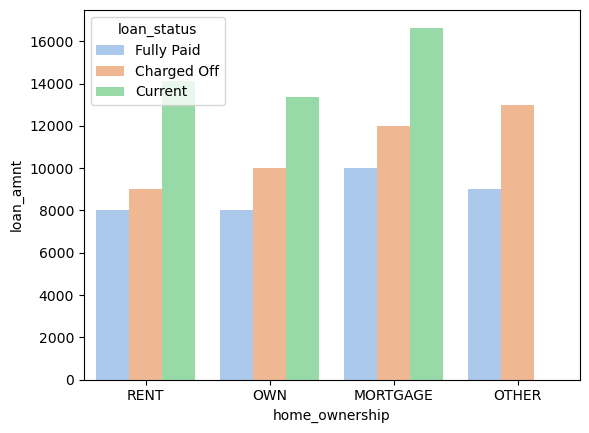

In [103]:
sns.barplot(data =df_lender ,y='loan_amnt', x='home_ownership', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'>Members with mortgage home are opted for higer loan amount.

##### annual_inc_bin_k Vs revol_util:

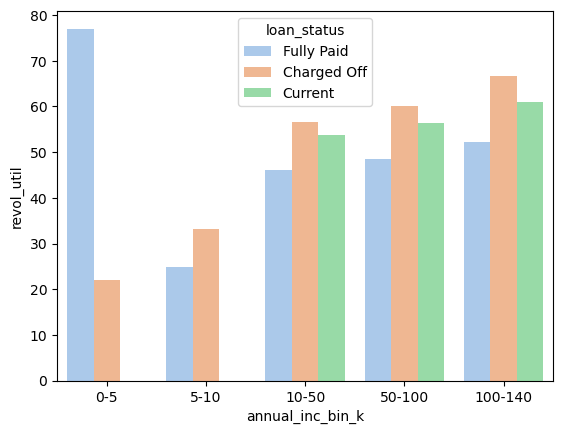

In [104]:
sns.barplot(data =df_lender ,y='revol_util', x='annual_inc_bin_k', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'> members with low annual income below 5000 have the high revolving utilization rate and they are fully paid.
Members with revolving utilization rate between 40-50 have more then 10000 income but tey are most Charged off.

##### annual_inc_bin_k Vs dti:

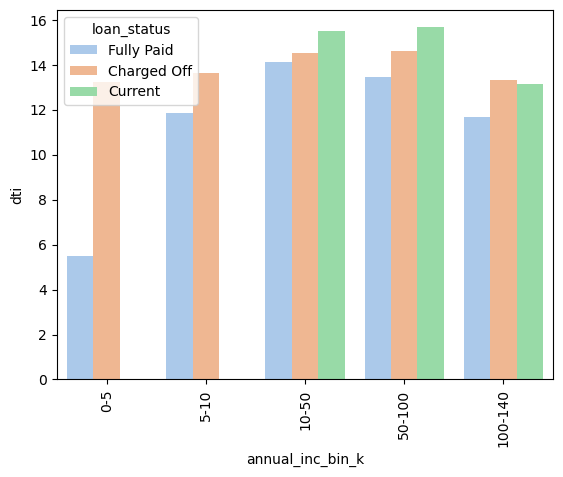

In [105]:
sns.barplot(data =df_lender ,y='dti', x='annual_inc_bin_k', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

##### year_issue_d Vs annaul_inc:

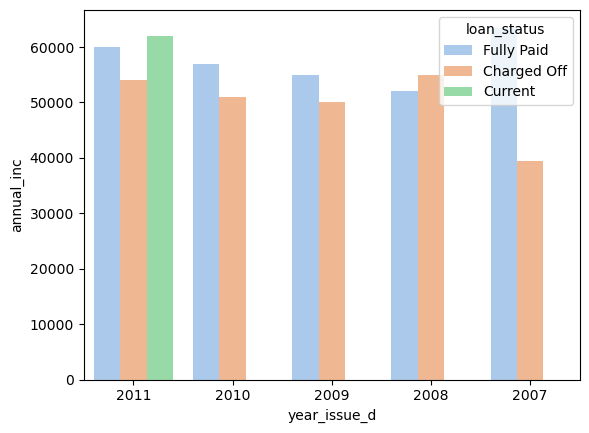

In [106]:
sns.barplot(data =df_lender ,y='annual_inc', x='year_issue_d', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

##### year_issue_d Vs total_acc:

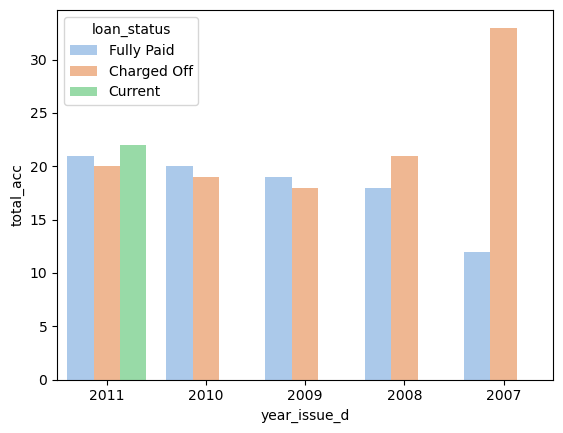

In [107]:
sns.barplot(data =df_lender ,y='total_acc', x='year_issue_d', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

##### purpose Vs revol_util:

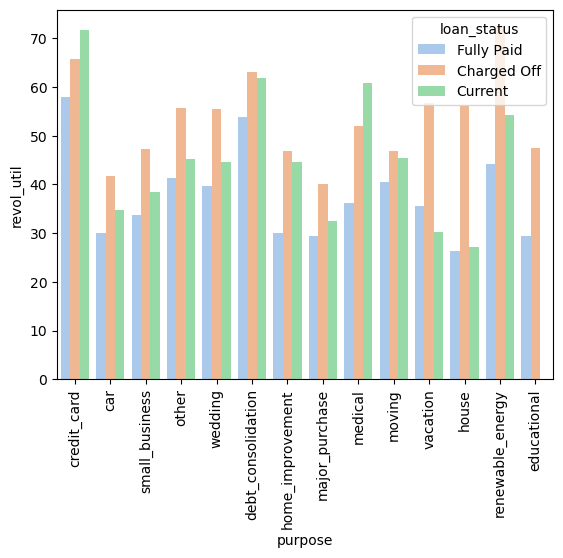

In [108]:
sns.barplot(data =df_lender ,y='revol_util', x='purpose', hue ='loan_status', palette="pastel", ci=None, estimator='median')
plt.xticks(rotation=90)
plt.show()

<font color='blue'>Members with high revolving utilization rate and opting loan for credit_card, nenewable_energy, debt_consolidation are most charged off and they are most fully paid.

##### pub_rec Vs revol_util:

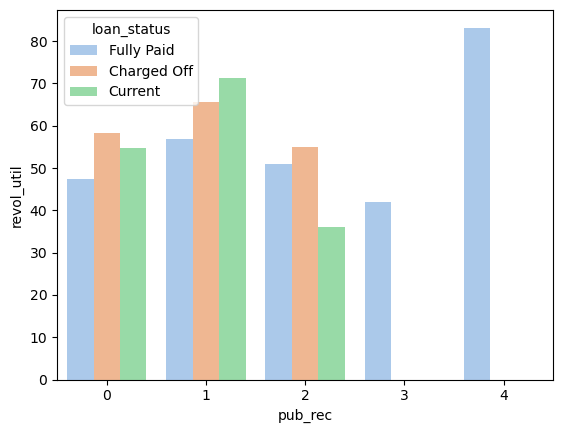

In [109]:
sns.barplot(data =df_lender ,y='revol_util', x='pub_rec', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

*Members having more derogatory records are most fully paid members*

##### pub_rec Vs dti:

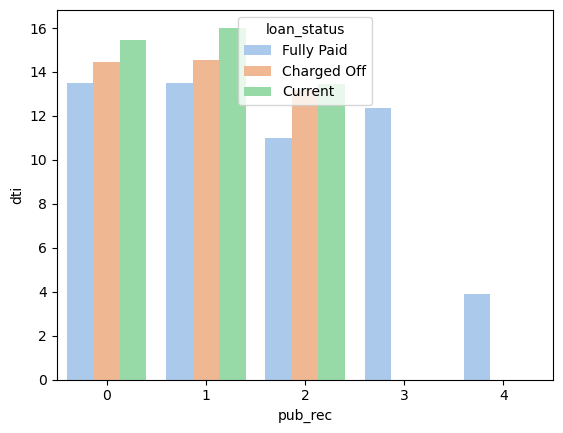

In [110]:
sns.barplot(data =df_lender ,y='dti', x='pub_rec', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

*Members having more derogatory records are fully paid members*

##### pub_rec Vs annual_inc:

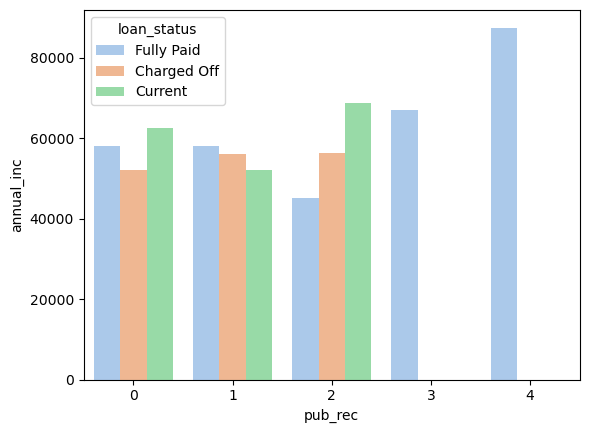

In [111]:
sns.barplot(data =df_lender ,y='annual_inc', x='pub_rec', hue ='loan_status', palette="pastel", ci=None, estimator='median')
#plt.xticks(rotation=90)
plt.show()

<font color='blue'>The interesting factors from above plot is 
Members having more derogatory records with high annual income are most fully paid members
and people who have less records are most charged off.

<font color='blue' size=5>----------------------------------------THANK YOU--------------------------------------------